# مشروع بناء نموذج تنبؤي لأمانة منطقة الجوف 
## الرخص التجارية
*الفكره*
تطوير نموذج تنبؤ زمني لتحليل بيانات إصدار الرخص التجارية حسب التوزيع الشهري والأسبوعي، بهدف استكشاف الأنماط الموسمية وتوقّع فترات الذروة أو الركود في الطلب على الرخص. سلسلة المهام الفرعية تتضمن: تجهيز البيانات، التحليل ، بناء النموذج، تفسير ونشر النتائج، وتوثيق الفوائد والاستنتاجات النهائية.

## 0. تنزيل المكتبات و البيانات

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("بيانات الرخص التجارية 2024.csv")
df.head()

,الأمانة,البلدية,نوع الطلب,تاريخ اصدار الرخصة ميلادي,تاريخ اصدار الرخصة هجري,تاريخ نهاية الرخصة ميلادي,تاريخ نهاية الرخصة هجري,حالة الرخصة,حالة الطلب,مسمى نشاط الايزك,...,تاريخ تحديث الطلب,رمز النشاط الرئيسي,تاريخ انتهاء الطلب,مصدر الطلب,تاريخ الالغاء هجري,تاريخ الالغاء ميلادي,تاريخ انتهاء الطلب.1,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب
0,أمانة منطقة الجوف,بلدية دومة الجندل,تعديل رخصة تجارية,8/27/03,1424/06/29,12/11/2025,1447/06/20,سارية,منتهى,التدوير وإعادة استخدام النفايات البلدية,...,12/22/24 11:21:03 AM,84,12/22/24 11:21:03 AM,MOMTATHEL,1443/10/16,5/17/22 12:00:00 AM,12/22/24 11:21:03 AM,SHOP,فوري,0.00
1,أمانة منطقة الجوف,بلدية طبرجل,إصدار رخصة تجارية,9/14/24,1446/03/11,09/03/2025,1447/03/11,سارية,منتهى,الصالونات الرجالية,...,9/14/24 10:17:57 PM,30,9/14/24 12:00:00 AM,APPLICATION,NaN,NaN,9/14/24 12:00:00 AM,SHOP,فوري,0.06
2,أمانة منطقة الجوف,الحديثة,إصدار رخصة تجارية,6/11/24,1445/12/05,06/01/2025,1446/12/05,منتهية,منتهى,البيع بالجملة والتجزئة لقطع الغيار الجديده للس...,...,6/11/24 8:11:49 PM,30,6/11/24 12:00:00 AM,APPLICATION,NaN,NaN,6/11/24 12:00:00 AM,SHOP,غير فوري,21.02
3,أمانة منطقة الجوف,بلدية دومة الجندل,تعديل رخصة تجارية,12/4/16,1438/03/05,09/20/2023,1445/03/05,ملغية,منتهى,الصالونات الرجالية,...,12/9/24 11:03:57 AM,30,12/9/24 11:03:57 AM,MOMTATHEL,NaN,NaN,12/9/24 11:03:57 AM,SHOP,فوري,0.00
4,أمانة منطقة الجوف,بلدية وسط سكاكا,نقل ملكية رخصة تجارية,8/14/24,1446/02/10,08/04/2025,1447/02/10,سارية,منتهى,المطاعم مع الخدمة,...,11/9/24 9:10:02 PM,60,11/9/24 9:10:02 PM,APPLICATION,1446/05/07,11/9/24 12:00:00 AM,11/9/24 9:10:02 PM,SHOP,فوري,3.17


## 1. تحليل البيانات الأستكشافي

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   الأمانة                                            7823 non-null   object 
 1   البلدية                                            7823 non-null   object 
 2   نوع الطلب                                          7823 non-null   object 
 3   تاريخ اصدار الرخصة ميلادي                          7823 non-null   object 
 4   تاريخ اصدار الرخصة هجري                            7823 non-null   object 
 5   تاريخ نهاية الرخصة ميلادي                          7823 non-null   object 
 6   تاريخ نهاية الرخصة هجري                            7823 non-null   object 
 7   حالة الرخصة                                        7823 non-null   object 
 8   حالة الطلب                                         7823 non-null   object 
 9   مسمى نشا

### 1.1 التحقق من القيم المفقودة

In [4]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Column '{col}' has missing values.")
        print(df[col].isnull().sum(), "missing values")

Column 'تاريخ تحديث الطلب' has missing values.
7 missing values
Column 'تاريخ الالغاء هجري' has missing values.
5636 missing values
Column 'تاريخ الالغاء ميلادي' has missing values.
5636 missing values


بعد التحقق من القيم المفقودة في جميع الأعمدة، لم يتم العثور على أي قيم ناقصة في بيانات الرخص التجارية تحتاج الى تعويض وملء. 



### 1.2 تحويل فئات الخصائص إلى نوع تاريخ

In [5]:
df.columns

Index(['الأمانة', 'البلدية', 'نوع الطلب', 'تاريخ اصدار الرخصة ميلادي',
       'تاريخ اصدار الرخصة هجري', 'تاريخ نهاية الرخصة ميلادي',
       'تاريخ نهاية الرخصة هجري', 'حالة الرخصة', 'حالة الطلب',
       'مسمى نشاط الايزك', 'اسم النشاط الرئيسي', 'كود النشاط التفصيلي',
       'مسمى النشاط التفصيلي', 'مسمى النشاط الفرعي', 'رمز نشاط الايزك',
       'تاريخ الطلب', 'تاريخ تحديث الطلب', 'رمز النشاط الرئيسي',
       'تاريخ انتهاء الطلب', 'مصدر الطلب', 'تاريخ الالغاء هجري',
       'تاريخ الالغاء ميلادي', 'تاريخ انتهاء الطلب.1', 'نوع الرخصة',
       'نوع اخر اجراء (فوري / غير فوري)',
       'عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب'],
      dtype='object')

In [6]:
for col in df.columns:
    if df[col].dtype == 'object' and 'تاريخ' in col and 'هجري' not in col:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"Column '{col}' converted to datetime.")

Column 'تاريخ اصدار الرخصة ميلادي' converted to datetime.


C:\Users\USER\AppData\Local\Temp\ipykernel_11856\848563665.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_11856\848563665.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Column 'تاريخ نهاية الرخصة ميلادي' converted to datetime.
Column 'تاريخ الطلب' converted to datetime.
Column 'تاريخ تحديث الطلب' converted to datetime.


C:\Users\USER\AppData\Local\Temp\ipykernel_11856\848563665.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Column 'تاريخ انتهاء الطلب' converted to datetime.
Column 'تاريخ الالغاء ميلادي' converted to datetime.


C:\Users\USER\AppData\Local\Temp\ipykernel_11856\848563665.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_11856\848563665.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Column 'تاريخ انتهاء الطلب.1' converted to datetime.


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.sample()

,الأمانة,البلدية,نوع الطلب,تاريخ اصدار الرخصة ميلادي,تاريخ اصدار الرخصة هجري,تاريخ نهاية الرخصة ميلادي,تاريخ نهاية الرخصة هجري,حالة الرخصة,حالة الطلب,مسمى نشاط الايزك,اسم النشاط الرئيسي,كود النشاط التفصيلي,مسمى النشاط التفصيلي,مسمى النشاط الفرعي,رمز نشاط الايزك,تاريخ الطلب,تاريخ تحديث الطلب,رمز النشاط الرئيسي,تاريخ انتهاء الطلب,مصدر الطلب,تاريخ الالغاء هجري,تاريخ الالغاء ميلادي,تاريخ انتهاء الطلب.1,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب
33,أمانة منطقة الجوف,بلدية شمال سكاكا,تجديد رخصة تجارية,2023-11-09,1445/04/25,2025-10-17,1447/04/25,سارية,منتهى,اصلاح ميكانيكا وكهرباء وسمكرة ودهان السيارات,الورش المهنية,1583,اصلاح ميكانيكا وكهرباء وسمكرة ودهان السيارات,اصلاح ميكانيكا وكهرباء وسمكرة ودهان السيارات,452022,2024-11-07,2024-11-17 05:12:13,42,2024-11-17,APPLICATION,NaN,NaT,2024-11-17,SHOP,فوري,9.51


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   الأمانة                                            7823 non-null   object        
 1   البلدية                                            7823 non-null   object        
 2   نوع الطلب                                          7823 non-null   object        
 3   تاريخ اصدار الرخصة ميلادي                          7823 non-null   datetime64[ns]
 4   تاريخ اصدار الرخصة هجري                            7823 non-null   object        
 5   تاريخ نهاية الرخصة ميلادي                          7823 non-null   datetime64[ns]
 6   تاريخ نهاية الرخصة هجري                            7823 non-null   object        
 7   حالة الرخصة                                        7823 non-null   object        
 8   حالة الطلب        

### 1.3 معالجة العمود المتكرر

In [10]:
if (df['تاريخ انتهاء الطلب'] == df['تاريخ انتهاء الطلب.1']).all():
    df.drop(columns=['تاريخ انتهاء الطلب.1'], inplace=True)
    print("Duplicate column 'تاريخ انتهاء الطلب.1' removed.")

Duplicate column 'تاريخ انتهاء الطلب.1' removed.


### 1.4 ماهو مدى البيانات

In [11]:
print(" Minimum date:", df['تاريخ الطلب'].min())
print(" Maximum date:", df['تاريخ الطلب'].max())

 Minimum date: 2024-01-01 00:00:00
 Maximum date: 2024-12-31 00:00:00


In [12]:
print("Minimum date:", df['تاريخ اصدار الرخصة ميلادي'].min())
print("Maximum date:", df['تاريخ اصدار الرخصة ميلادي'].max())

Minimum date: 1984-04-18 00:00:00
Maximum date: 2025-06-25 00:00:00


In [13]:
print('minimun order cancelling order data',df['تاريخ الالغاء ميلادي'].min())
print('maximum order cancelling order data',df['تاريخ الالغاء ميلادي'].max())

minimun order cancelling order data 2020-02-23 00:00:00
maximum order cancelling order data 2025-07-20 00:00:00


In [14]:
count = 0
for col in df.columns:
    if 'تاريخ' in col:
        count+=1
print("Number of date columns:", count)

Number of date columns: 10


### 1.5 ماهي القيم داخل الأعمدة

In [15]:
for col in df.columns:
    if df[col].dtype == 'object' and 'تاريخ' not in col:
        unique_values = df[col].unique()
        print(f"Column '{col}' has {len(unique_values)} unique values.")

Column 'الأمانة' has 1 unique values.
Column 'البلدية' has 13 unique values.
Column 'نوع الطلب' has 8 unique values.
Column 'حالة الرخصة' has 4 unique values.
Column 'حالة الطلب' has 2 unique values.
Column 'مسمى نشاط الايزك' has 477 unique values.
Column 'اسم النشاط الرئيسي' has 16 unique values.
Column 'مسمى النشاط التفصيلي' has 673 unique values.
Column 'مسمى النشاط الفرعي' has 673 unique values.
Column 'مصدر الطلب' has 9 unique values.
Column 'نوع الرخصة' has 2 unique values.
Column 'نوع اخر اجراء (فوري / غير فوري)' has 2 unique values.


In [16]:
for col in df.columns:
    if df[col].dtype == 'object' and 'تاريخ' not in col:
        values = df[col].value_counts()
        print(f"Column '{col}' value counts:")
        print(values)
        print("\n")


Column 'الأمانة' value counts:
الأمانة
أمانة منطقة الجوف    7823
Name: count, dtype: int64


Column 'البلدية' value counts:
البلدية
بلدية وسط سكاكا            2290
بلدية القريات              2080
بلدية طبرجل                1280
بلدية شمال سكاكا            740
بلدية دومة الجندل           508
بلدية جنوب سكاكا - قارا     338
بلدية صوير                  155
بلدية أبوعجرم               142
الحديثة                     117
بلدية زلوم                   70
بلدية العيساويه              63
بلدية الناصفه                29
أمانة منطقة الجوف            11
Name: count, dtype: int64


Column 'نوع الطلب' value counts:
نوع الطلب
تعديل رخصة تجارية               3970
تجديد رخصة تجارية               1620
إصدار رخصة تجارية                941
الغاء رخصة تجارية                864
الإلغاء الآلي للرخص المنتهية     182
نقل ملكية رخصة تجارية            177
تحديث بيانات رخصة تجارية          68
طلب رخصة قديمة                     1
Name: count, dtype: int64


Column 'حالة الرخصة' value counts:
حالة الرخصة
سارية     

In [17]:
df[df['حالة الطلب'] == 'يوجد ملاحظات رقابة لاحقة'].head(7)

,الأمانة,البلدية,نوع الطلب,تاريخ اصدار الرخصة ميلادي,تاريخ اصدار الرخصة هجري,تاريخ نهاية الرخصة ميلادي,تاريخ نهاية الرخصة هجري,حالة الرخصة,حالة الطلب,مسمى نشاط الايزك,اسم النشاط الرئيسي,كود النشاط التفصيلي,مسمى النشاط التفصيلي,مسمى النشاط الفرعي,رمز نشاط الايزك,تاريخ الطلب,تاريخ تحديث الطلب,رمز النشاط الرئيسي,تاريخ انتهاء الطلب,مصدر الطلب,تاريخ الالغاء هجري,تاريخ الالغاء ميلادي,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب
1591,أمانة منطقة الجوف,بلدية طبرجل,تعديل رخصة تجارية,2022-05-25,1443/10/24,2025-04-22,1446/10/24,منتهية,يوجد ملاحظات رقابة لاحقة,البيع بالتجزئة لمنتجات المخابز والحلويات السكرية,المحلات التجارية,1668,البيع بالتجزئة لمنتجات المخابز والحلويات السكرية,البيع بالتجزئة لمنتجات المخابز والحلويات السكرية,472161,2024-10-23,2025-07-29 11:21:28,30,2024-10-23 17:41:33,MOMTATHEL,NaN,NaT,SHOP,فوري,278.74
1635,أمانة منطقة الجوف,بلدية طبرجل,تعديل رخصة تجارية,2016-10-15,1438/01/14,2025-07-09,1447/01/14,منتهية,يوجد ملاحظات رقابة لاحقة,المطاعم مع الخدمة,المطابخ و المطاعم و ما في حكمها,1319,المطاعم مع الخدمة,المطاعم مع الخدمة,561010,2024-11-19,2025-07-29 11:19:45,60,2024-11-19 10:17:43,MOMTATHEL,NaN,NaT,SHOP,فوري,252.04
3033,أمانة منطقة الجوف,بلدية طبرجل,تعديل رخصة تجارية,2018-04-20,1439/08/04,2027-01-11,1448/08/03,سارية,يوجد ملاحظات رقابة لاحقة,غسل وكي والتنظيف الجاف لشتى أنواع الملابس بما ...,المحلات التجارية,1129,مغسلة ملابس عادية,مغسلة ملابس عادية,960110,2024-10-23,2025-07-29 11:21:09,30,2024-10-23 13:56:57,MOMTATHEL,NaN,NaT,SHOP,فوري,278.89
3785,أمانة منطقة الجوف,بلدية أبوعجرم,تعديل رخصة تجارية,2017-02-23,1438/05/26,2027-10-25,1449/05/25,سارية,يوجد ملاحظات رقابة لاحقة,تفصيل وخياطة وحياكة الملابس الرجالية العربية ...,المحلات التجارية,1441,تفصيل وخياطة وحياكة الملابس الرجالية العربية م...,تفصيل وخياطة وحياكة الملابس الرجالية العربية م...,141040,2024-12-13,2024-12-15 13:10:54,30,2024-12-13 18:16:43,MOMTATHEL,1443/03/15,2021-10-21,SHOP,فوري,1.79
4355,أمانة منطقة الجوف,بلدية طبرجل,تعديل رخصة تجارية,2022-05-23,1443/10/22,2025-04-20,1446/10/22,منتهية,يوجد ملاحظات رقابة لاحقة,اصلاح ميكانيكا وكهرباء السيارات,الورش المهنية,1582,اصلاح ميكانيكا وكهرباء السيارات,اصلاح ميكانيكا وكهرباء السيارات,452021,2024-11-28,2024-12-18 13:11:16,42,2024-11-28 14:05:15,MOMTATHEL,NaN,NaT,SHOP,فوري,19.96
5289,أمانة منطقة الجوف,بلدية أبوعجرم,تعديل رخصة تجارية,2020-11-04,1442/03/18,2025-09-10,1447/03/18,موقوفة,يوجد ملاحظات رقابة لاحقة,المطاعم مع الخدمة,المطابخ و المطاعم و ما في حكمها,832,مطعم بروستد,مطعم بروستد,561010,2024-11-05,2024-11-10 09:14:19,60,2024-11-05 08:53:16,MOMTATHEL,NaN,NaT,SHOP,فوري,5.01
6800,أمانة منطقة الجوف,بلدية طبرجل,تعديل رخصة تجارية,2022-07-06,1443/12/07,2025-06-03,1446/12/07,منتهية,يوجد ملاحظات رقابة لاحقة,إصلاح وصيانة الجرارات الزراعية,الورش المهنية,1525,إصلاح وصيانة الجرارات الزراعية,إصلاح وصيانة الجرارات الزراعية,331221,2024-11-28,2024-12-18 12:56:53,42,2024-11-28 14:09:16,MOMTATHEL,NaN,NaT,SHOP,فوري,19.95


In [18]:
df[df['تاريخ تحديث الطلب'].isnull()].head(7)

,الأمانة,البلدية,نوع الطلب,تاريخ اصدار الرخصة ميلادي,تاريخ اصدار الرخصة هجري,تاريخ نهاية الرخصة ميلادي,تاريخ نهاية الرخصة هجري,حالة الرخصة,حالة الطلب,مسمى نشاط الايزك,اسم النشاط الرئيسي,كود النشاط التفصيلي,مسمى النشاط التفصيلي,مسمى النشاط الفرعي,رمز نشاط الايزك,تاريخ الطلب,تاريخ تحديث الطلب,رمز النشاط الرئيسي,تاريخ انتهاء الطلب,مصدر الطلب,تاريخ الالغاء هجري,تاريخ الالغاء ميلادي,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب
181,أمانة منطقة الجوف,بلدية طبرجل,إصدار رخصة تجارية,2024-04-04,1445/09/25,2029-02-09,1450/09/25,سارية,منتهى,البيع بالتجزئة لبذور النباتات والاسمدة ومحسنات...,المحلات التجارية,862082,البيع بالتجزئة لبذور النباتات والاسمدة ومحسنات...,البيع بالتجزئة لبذور النباتات والاسمدة ومحسنات...,477357,2024-04-04,NaT,30,2024-04-04 16:59:16,Old License Page,NaN,NaT,SHOP,فوري,1.067520e+11
695,أمانة منطقة الجوف,بلدية طبرجل,إصدار رخصة تجارية,2023-12-23,1445/06/10,2029-10-18,1451/06/10,سارية,منتهى,البيع بالتجزئة لبذور النباتات والاسمدة ومحسنات...,المحلات التجارية,862082,البيع بالتجزئة لبذور النباتات والاسمدة ومحسنات...,البيع بالتجزئة لبذور النباتات والاسمدة ومحسنات...,477357,2024-12-12,NaT,30,2024-12-12 22:17:18,Old License Page,NaN,NaT,SHOP,فوري,1.067520e+11
2515,أمانة منطقة الجوف,بلدية طبرجل,إصدار رخصة تجارية,2021-01-23,1442/06/10,2029-10-18,1451/06/10,سارية,منتهى,ميزان السيارات,الورش المهنية,384,ميزان السيارات,ميزان السيارات,452043,2024-12-12,NaT,42,2024-12-12 22:36:08,Old License Page,NaN,NaT,SHOP,فوري,1.067520e+11
6042,أمانة منطقة الجوف,بلدية طبرجل,تعديل رخصة تجارية,2017-03-22,1438/06/23,2028-11-10,1450/06/23,منتهية,منتهى,البيع بالتجزئة لوقود السيارات والدراجات الناري...,محطات الوقود ( داخل النطاق العمراني ),862845,محطات الوقود ومراكز الخدمة فئة أ 1,محطات الوقود ومراكز الخدمة فئة أ 1,473010,2024-01-05,NaT,21,2024-01-05 12:11:06,Old License Page,NaN,NaT,SHOP,فوري,1.067520e+11
7004,أمانة منطقة الجوف,بلدية طبرجل,إصدار رخصة تجارية,2024-04-02,1445/09/23,2026-03-12,1447/09/23,سارية,منتهى,صناعة الخبز البلدي المحلي,المطابخ و المطاعم و ما في حكمها,38,مخبز عادي,مخبز عادي,107110,2024-04-02,NaT,60,2024-04-02 03:50:13,Old License Page,NaN,NaT,SHOP,فوري,1.067520e+11
7157,أمانة منطقة الجوف,بلدية طبرجل,إصدار رخصة تجارية,2023-12-31,1445/06/18,2029-10-26,1451/06/18,سارية,منتهى,البيع بالتجزئة لسكراب مواد البناء يشمل تجارة ا...,المحلات التجارية,1689,البيع بالتجزئة للسكراب ومواد البناء يشمل تجارة...,البيع بالتجزئة للسكراب ومواد البناء يشمل تجارة...,475282,2024-12-19,NaT,30,2024-12-19 22:01:26,Old License Page,NaN,NaT,SHOP,فوري,1.067520e+11
7591,أمانة منطقة الجوف,بلدية طبرجل,إصدار رخصة تجارية,2023-01-03,1444/06/10,2029-10-18,1451/06/10,سارية,منتهى,البيع بالجملة لاغذية واعلاف الحيوانات المنزلية,المحلات التجارية,1616,البيع بالجملة لاغذية واعلاف الحيوانات المنزلية,البيع بالجملة لاغذية واعلاف الحيوانات المنزلية,463080,2024-12-12,NaT,30,2024-12-12 22:39:20,Old License Page,NaN,NaT,SHOP,فوري,1.067520e+11


### 1.6 حذف العينات المكررة

In [19]:
df[df.duplicated()]

,الأمانة,البلدية,نوع الطلب,تاريخ اصدار الرخصة ميلادي,تاريخ اصدار الرخصة هجري,تاريخ نهاية الرخصة ميلادي,تاريخ نهاية الرخصة هجري,حالة الرخصة,حالة الطلب,مسمى نشاط الايزك,اسم النشاط الرئيسي,كود النشاط التفصيلي,مسمى النشاط التفصيلي,مسمى النشاط الفرعي,رمز نشاط الايزك,تاريخ الطلب,تاريخ تحديث الطلب,رمز النشاط الرئيسي,تاريخ انتهاء الطلب,مصدر الطلب,تاريخ الالغاء هجري,تاريخ الالغاء ميلادي,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب
2544,أمانة منطقة الجوف,بلدية القريات,تجديد رخصة تجارية,2022-01-26,1443/06/23,2025-12-14,1447/06/23,سارية,منتهى,غسل وكي والتنظيف الجاف لشتى أنواع الملابس بما ...,المحلات التجارية,1886,غسل وكي والتنظيف الجاف لشتى أنواع الملابس بما ...,غسل وكي والتنظيف الجاف لشتى أنواع الملابس بما ...,960110,2024-01-15,2024-02-02 07:57:51,30,2024-01-15,APPLICATION,NaN,NaT,SHOP,فوري,17.75


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7822 entries, 0 to 7822
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   الأمانة                                            7822 non-null   object        
 1   البلدية                                            7822 non-null   object        
 2   نوع الطلب                                          7822 non-null   object        
 3   تاريخ اصدار الرخصة ميلادي                          7822 non-null   datetime64[ns]
 4   تاريخ اصدار الرخصة هجري                            7822 non-null   object        
 5   تاريخ نهاية الرخصة ميلادي                          7822 non-null   datetime64[ns]
 6   تاريخ نهاية الرخصة هجري                            7822 non-null   object        
 7   حالة الرخصة                                        7822 non-null   object        
 8   حالة الطلب             

## 2. تحليل البيانات 

### 2.1 مدة صلاحية الرخصة

In [22]:
df['مدة صلاحية الرخصة'] = df['تاريخ نهاية الرخصة ميلادي'] - df['تاريخ اصدار الرخصة ميلادي']
df['مدة صلاحية الرخصة'] =df['مدة صلاحية الرخصة'].dt.days / 30 / 12 
df['مدة صلاحية الرخصة'] = df['مدة صلاحية الرخصة'].round()

df['مدة صلاحية الرخصة'].unique()


array([23.,  1.,  7.,  2.,  9.,  8.,  3., 10.,  5., 18., 13., 32.,  6.,
       31.,  4., 16., 12., 11., 35., 15., 20., 17., 22., 14., 27., 30.,
       19., 25., 28., 21., 26., 33., 41., 40., 24., 29., 39.,  0., 34.,
       37., 42., 38.])

In [23]:
print("Minimum renewal period:", df['مدة صلاحية الرخصة'].min(), "years")
print("Maximum renewal period:", df['مدة صلاحية الرخصة'].max(), "years")

df['مدة صلاحية الرخصة'].describe()

Minimum renewal period: 0.0 years
Maximum renewal period: 42.0 years


count    7822.000000
mean        4.698415
std         4.292519
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        42.000000
Name: مدة صلاحية الرخصة, dtype: float64

In [24]:
print('number of linceses has validity more than 10 years:', df[df['مدة صلاحية الرخصة'] > 10].shape[0])

number of linceses has validity more than 10 years: 523


Text(0.5, 0, 'Validity Period (Years)')

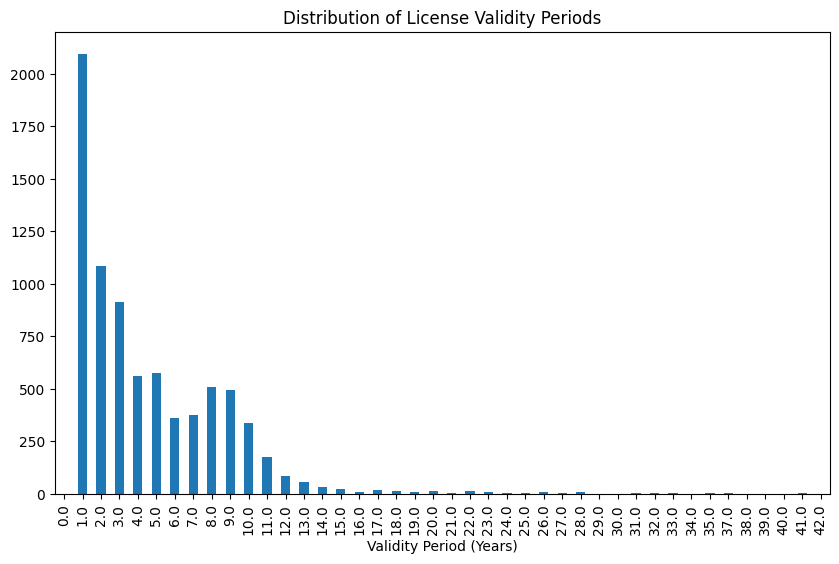

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
df['مدة صلاحية الرخصة'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of License Validity Periods')
plt.xlabel('Validity Period (Years)')

#### 2.1.1 انشاء عمود فئة صلاحية الرخصة

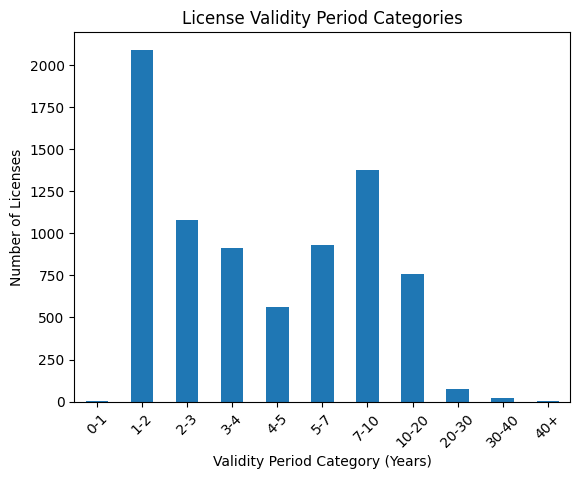

In [26]:
df['فئة مدة صلاحية الرخصة'] = pd.cut(df['مدة صلاحية الرخصة'],
                                     bins=[0, 1, 2, 3, 4, 5, 7, 10, 20, 30, 40, float('inf')],
                                        labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-7', '7-10', '10-20', '20-30', '30-40', '40+'],
                                            right=False)
df['فئة مدة صلاحية الرخصة'].value_counts().sort_index().plot(kind='bar')
plt.title('License Validity Period Categories')
plt.xlabel('Validity Period Category (Years)')
plt.ylabel('Number of Licenses')
plt.xticks(rotation=45)
plt.show()
                                    

In [27]:
df['فئة مدة صلاحية الرخصة'] = df['فئة مدة صلاحية الرخصة'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7822 entries, 0 to 7822
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   الأمانة                                            7822 non-null   object        
 1   البلدية                                            7822 non-null   object        
 2   نوع الطلب                                          7822 non-null   object        
 3   تاريخ اصدار الرخصة ميلادي                          7822 non-null   datetime64[ns]
 4   تاريخ اصدار الرخصة هجري                            7822 non-null   object        
 5   تاريخ نهاية الرخصة ميلادي                          7822 non-null   datetime64[ns]
 6   تاريخ نهاية الرخصة هجري                            7822 non-null   object        
 7   حالة الرخصة                                        7822 non-null   object        
 8   حالة الطلب             

### 2.2 تحليل تنوع القيم في الخصائص

In [28]:
df.columns

Index(['الأمانة', 'البلدية', 'نوع الطلب', 'تاريخ اصدار الرخصة ميلادي',
       'تاريخ اصدار الرخصة هجري', 'تاريخ نهاية الرخصة ميلادي',
       'تاريخ نهاية الرخصة هجري', 'حالة الرخصة', 'حالة الطلب',
       'مسمى نشاط الايزك', 'اسم النشاط الرئيسي', 'كود النشاط التفصيلي',
       'مسمى النشاط التفصيلي', 'مسمى النشاط الفرعي', 'رمز نشاط الايزك',
       'تاريخ الطلب', 'تاريخ تحديث الطلب', 'رمز النشاط الرئيسي',
       'تاريخ انتهاء الطلب', 'مصدر الطلب', 'تاريخ الالغاء هجري',
       'تاريخ الالغاء ميلادي', 'نوع الرخصة', 'نوع اخر اجراء (فوري / غير فوري)',
       'عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب',
       'مدة صلاحية الرخصة', 'فئة مدة صلاحية الرخصة'],
      dtype='object')

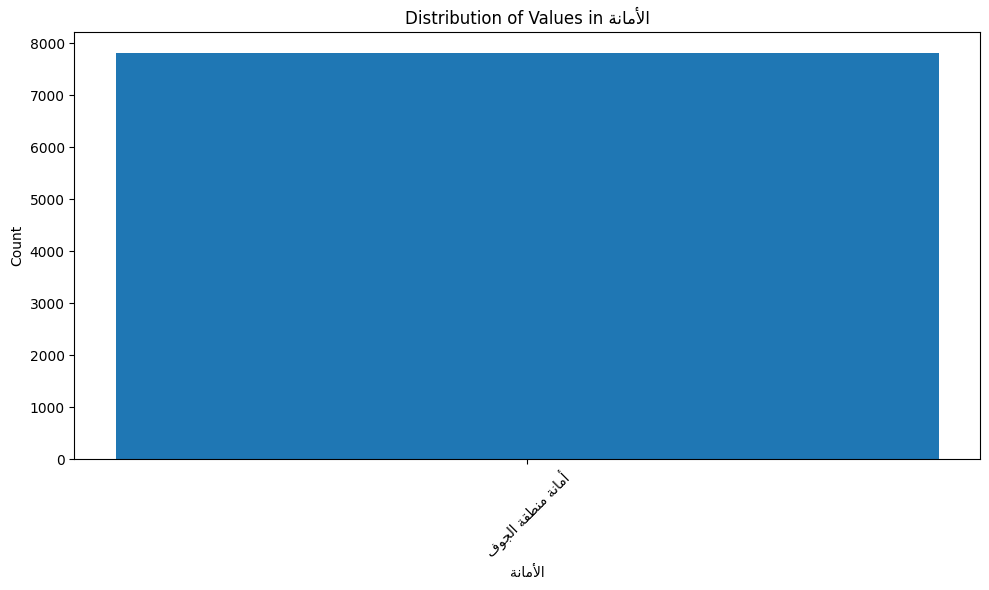

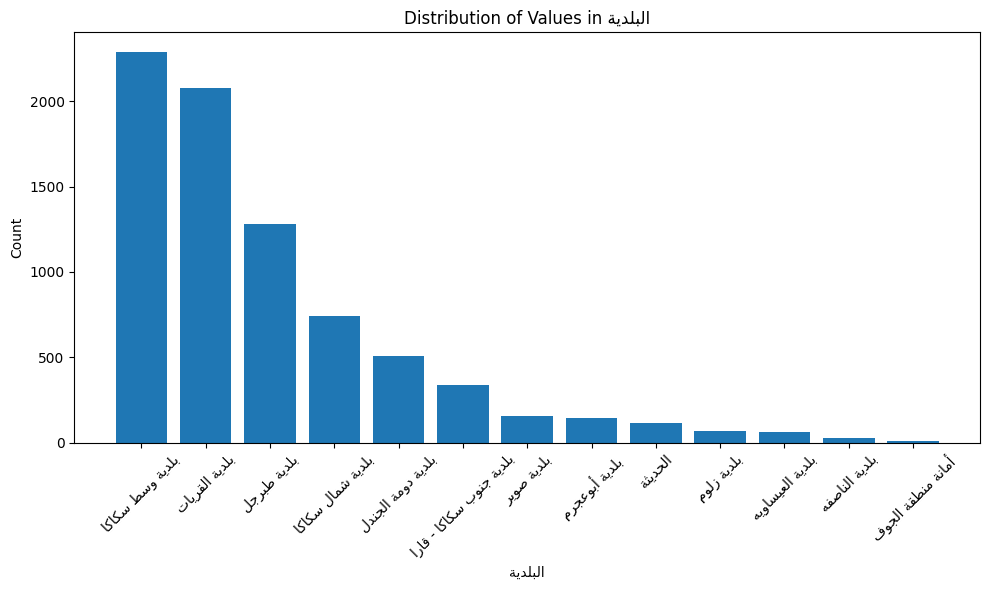

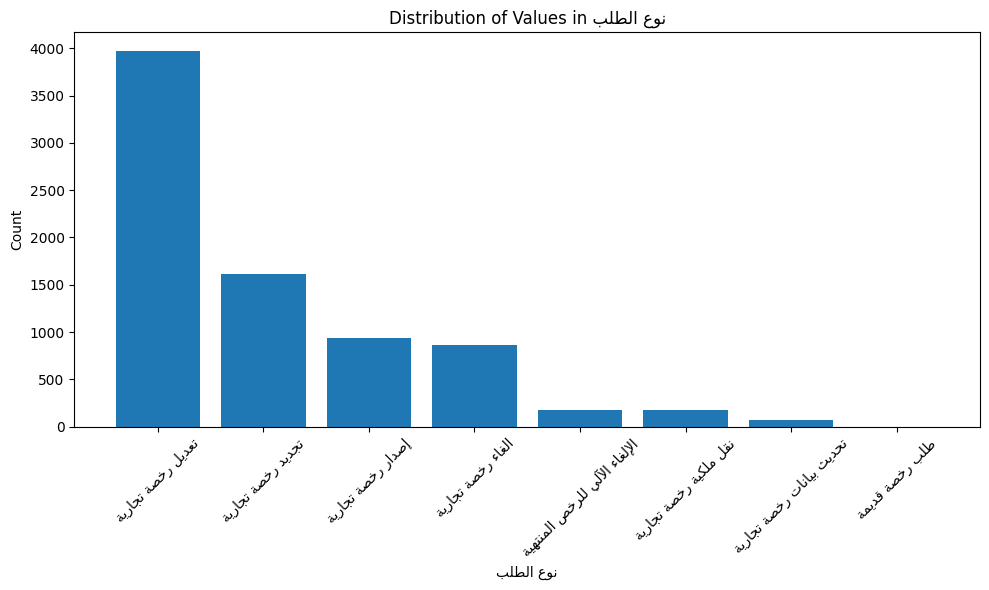

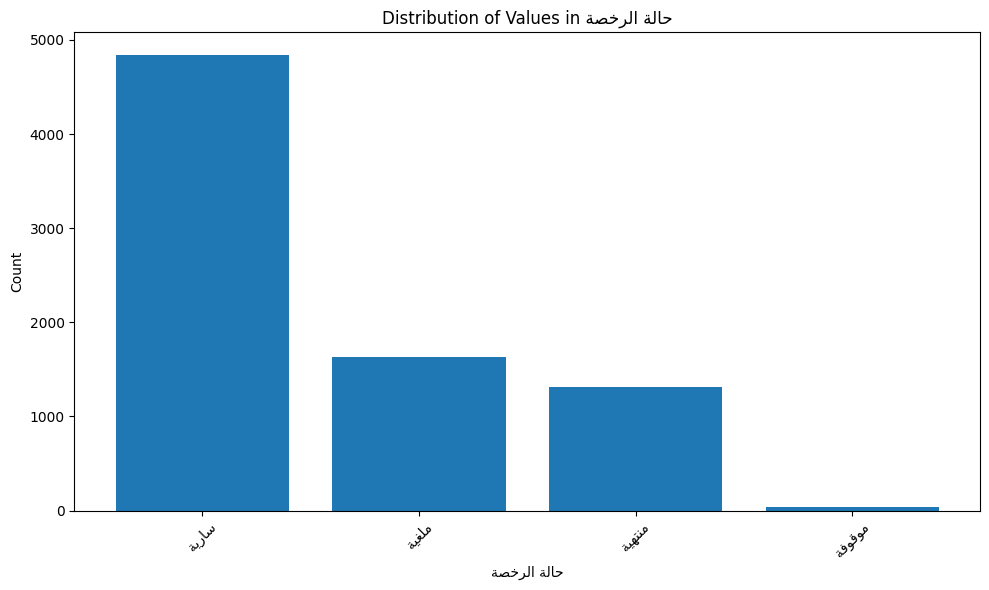

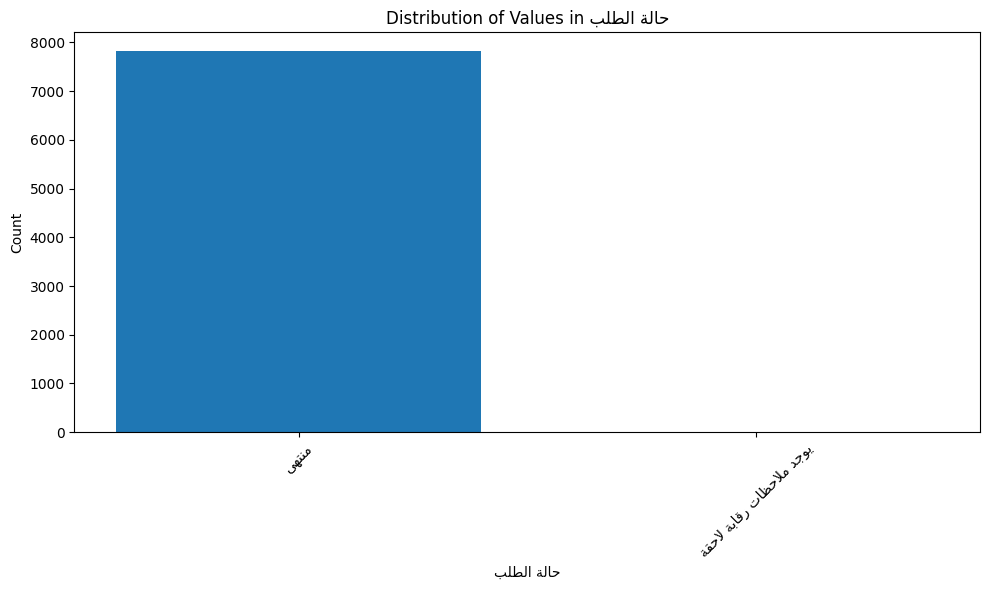

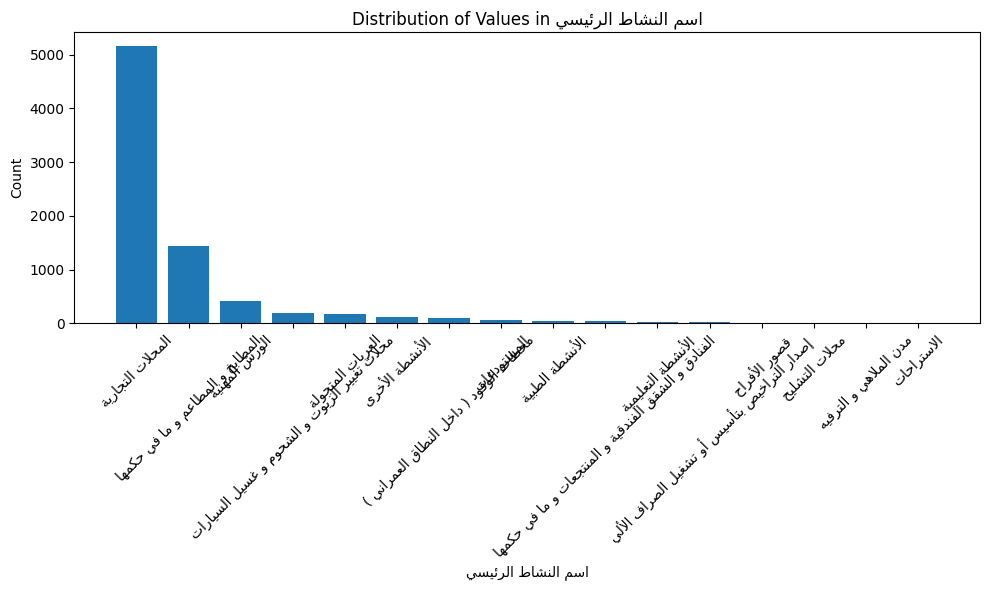

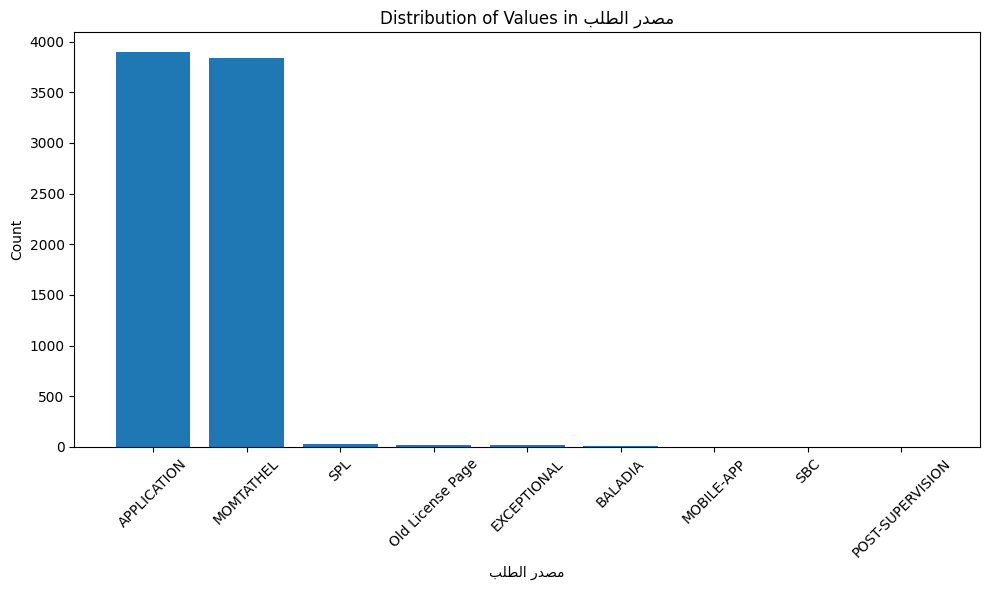

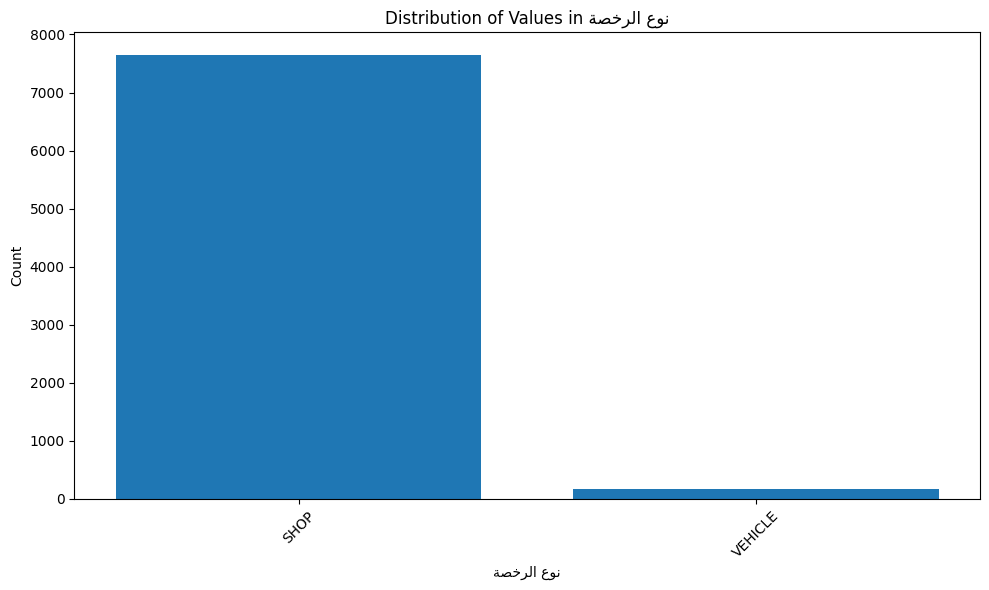

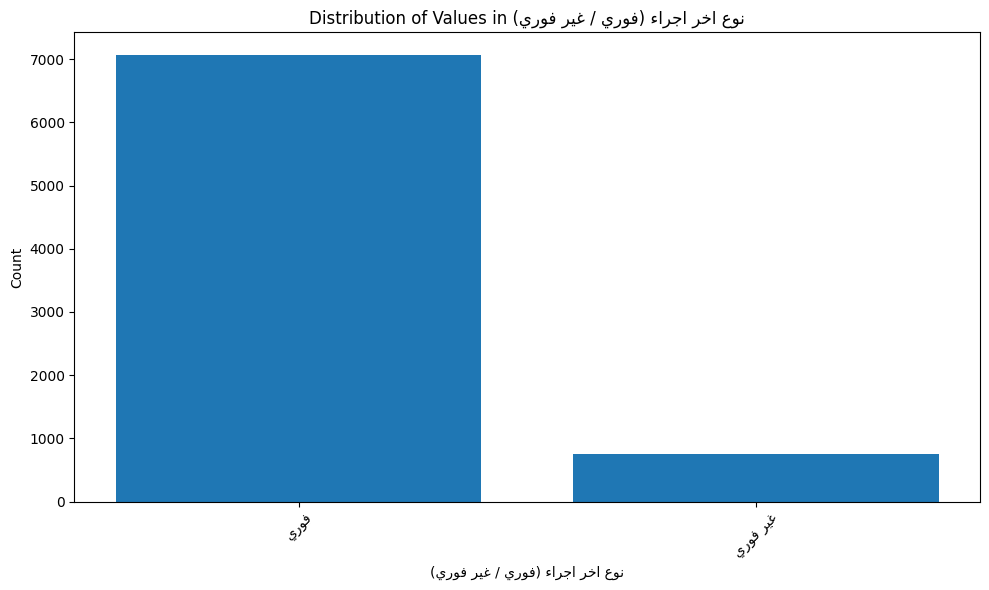

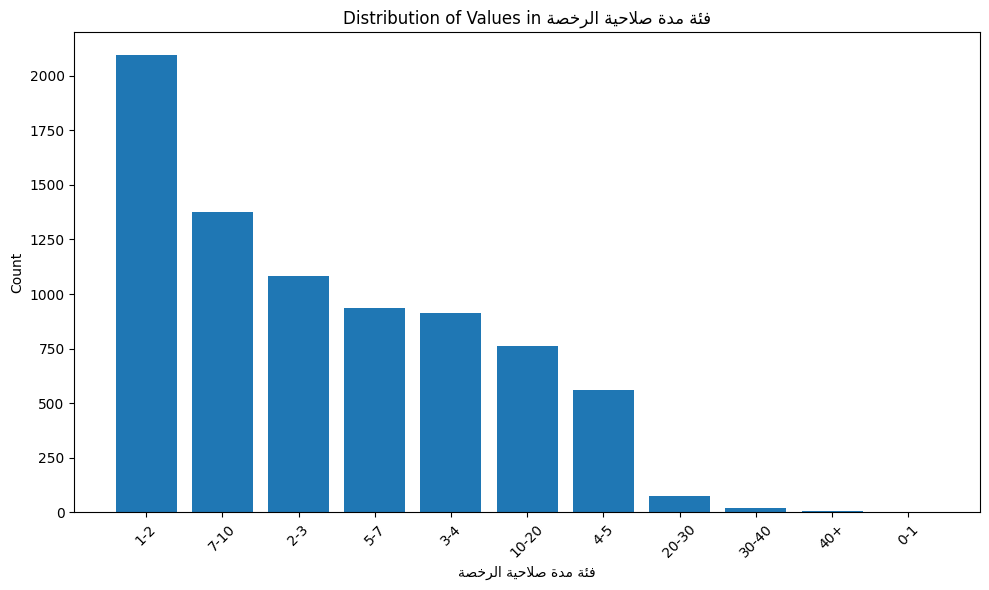

In [29]:
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

for col in df.columns:
    if df[col].dtype == 'object' and 'تاريخ' not in col:
        value_counts = df[col].value_counts()
        
        if len(value_counts) < 20:
            reshaped_labels = [get_display(arabic_reshaper.reshape(str(label))) for label in value_counts.index]
            
            plt.figure(figsize=(10, 6))
            plt.bar(reshaped_labels, value_counts.values)
            
            reshaped_title = get_display(arabic_reshaper.reshape(col))
            plt.title(f'Distribution of Values in {reshaped_title}')
            plt.xlabel(reshaped_title)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


In [30]:
df.columns

Index(['الأمانة', 'البلدية', 'نوع الطلب', 'تاريخ اصدار الرخصة ميلادي',
       'تاريخ اصدار الرخصة هجري', 'تاريخ نهاية الرخصة ميلادي',
       'تاريخ نهاية الرخصة هجري', 'حالة الرخصة', 'حالة الطلب',
       'مسمى نشاط الايزك', 'اسم النشاط الرئيسي', 'كود النشاط التفصيلي',
       'مسمى النشاط التفصيلي', 'مسمى النشاط الفرعي', 'رمز نشاط الايزك',
       'تاريخ الطلب', 'تاريخ تحديث الطلب', 'رمز النشاط الرئيسي',
       'تاريخ انتهاء الطلب', 'مصدر الطلب', 'تاريخ الالغاء هجري',
       'تاريخ الالغاء ميلادي', 'نوع الرخصة', 'نوع اخر اجراء (فوري / غير فوري)',
       'عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب',
       'مدة صلاحية الرخصة', 'فئة مدة صلاحية الرخصة'],
      dtype='object')

### 2.3 مصفوفه الارتباط

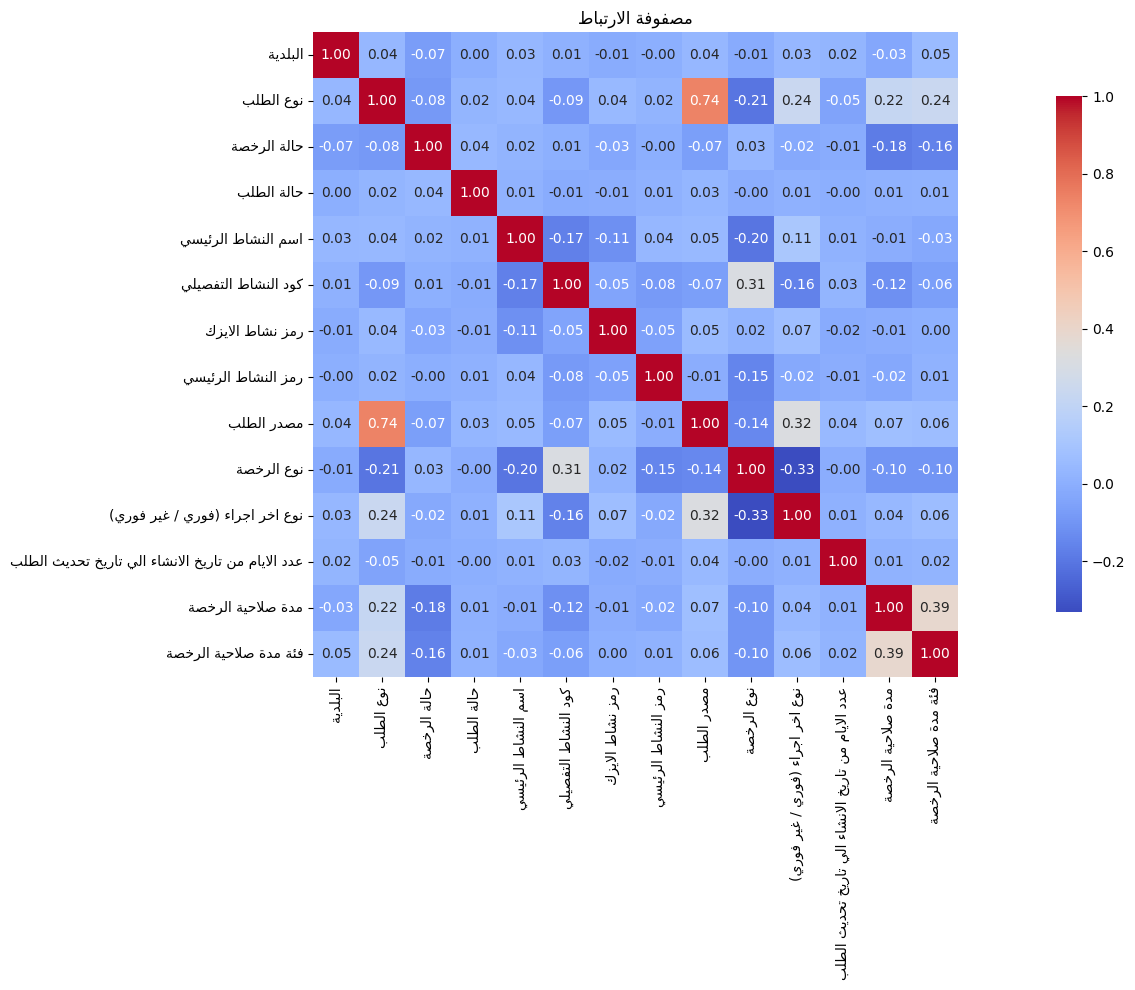

In [31]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Label Encoding for categorical columns with < 20 unique values (excluding 'تاريخ')
data = df.copy()
for col in data.columns:
    if data[col].dtype == 'object' and 'تاريخ' not in col:
        if len(data[col].unique()) < 20:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))

corr_matrix = data.corr(numeric_only=True)

corr_matrix = corr_matrix.iloc[1:, 1:]

reshaped_labels = [get_display(arabic_reshaper.reshape(str(label))) for label in corr_matrix.columns]
corr_matrix.columns = reshaped_labels
corr_matrix.index = reshaped_labels

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title(get_display(arabic_reshaper.reshape('مصفوفة الارتباط'))) 
plt.tight_layout()
plt.show()


In [32]:
df.sample()

,الأمانة,البلدية,نوع الطلب,تاريخ اصدار الرخصة ميلادي,تاريخ اصدار الرخصة هجري,تاريخ نهاية الرخصة ميلادي,تاريخ نهاية الرخصة هجري,حالة الرخصة,حالة الطلب,مسمى نشاط الايزك,اسم النشاط الرئيسي,كود النشاط التفصيلي,مسمى النشاط التفصيلي,مسمى النشاط الفرعي,رمز نشاط الايزك,تاريخ الطلب,تاريخ تحديث الطلب,رمز النشاط الرئيسي,تاريخ انتهاء الطلب,مصدر الطلب,تاريخ الالغاء هجري,تاريخ الالغاء ميلادي,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب,مدة صلاحية الرخصة,فئة مدة صلاحية الرخصة
5188,أمانة منطقة الجوف,بلدية وسط سكاكا,إصدار رخصة تجارية,2024-05-27,1445/11/19,2025-05-17,1446/11/19,منتهية,منتهى,البوفيهات الكافيتريات,المطابخ و المطاعم و ما في حكمها,1763,البوفيهات الكافيتريات,البوفيهات الكافيتريات,561021,2024-05-26,2024-05-27 13:05:44,60,2024-05-27,APPLICATION,NaN,NaT,SHOP,فوري,0.8,1.0,1-2


In [33]:
data.sample()

,الأمانة,البلدية,نوع الطلب,تاريخ اصدار الرخصة ميلادي,تاريخ اصدار الرخصة هجري,تاريخ نهاية الرخصة ميلادي,تاريخ نهاية الرخصة هجري,حالة الرخصة,حالة الطلب,مسمى نشاط الايزك,اسم النشاط الرئيسي,كود النشاط التفصيلي,مسمى النشاط التفصيلي,مسمى النشاط الفرعي,رمز نشاط الايزك,تاريخ الطلب,تاريخ تحديث الطلب,رمز النشاط الرئيسي,تاريخ انتهاء الطلب,مصدر الطلب,تاريخ الالغاء هجري,تاريخ الالغاء ميلادي,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب,مدة صلاحية الرخصة,فئة مدة صلاحية الرخصة
4589,0,4,3,2022-12-26,1444/06/02,2025-11-23,1447/06/02,0,0,صناعة الخبز البلدي المحلي,9,1416,مخابز صناعة الخبز البلدي المحلي,مخابز صناعة الخبز البلدي المحلي,107110,2024-02-29,2024-03-04 19:49:05,60,2024-03-04,0,NaN,NaT,0,0,4.64,3.0,5


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7822 entries, 0 to 7822
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   الأمانة                                            7822 non-null   int64         
 1   البلدية                                            7822 non-null   int64         
 2   نوع الطلب                                          7822 non-null   int64         
 3   تاريخ اصدار الرخصة ميلادي                          7822 non-null   datetime64[ns]
 4   تاريخ اصدار الرخصة هجري                            7822 non-null   object        
 5   تاريخ نهاية الرخصة ميلادي                          7822 non-null   datetime64[ns]
 6   تاريخ نهاية الرخصة هجري                            7822 non-null   object        
 7   حالة الرخصة                                        7822 non-null   int64         
 8   حالة الطلب             

### 2.4 تحليل الارتباط التاريخي

In [35]:
for col in df.columns:
    if 'تاريخ' in col:
        print(col)

تاريخ اصدار الرخصة ميلادي
تاريخ اصدار الرخصة هجري
تاريخ نهاية الرخصة ميلادي
تاريخ نهاية الرخصة هجري
تاريخ الطلب
تاريخ تحديث الطلب
تاريخ انتهاء الطلب
تاريخ الالغاء هجري
تاريخ الالغاء ميلادي
عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب


In [36]:
for col in df.columns:
    if 'تاريخ' in col and 'هجري' not in col:
        print(col)

تاريخ اصدار الرخصة ميلادي
تاريخ نهاية الرخصة ميلادي
تاريخ الطلب
تاريخ تحديث الطلب
تاريخ انتهاء الطلب
تاريخ الالغاء ميلادي
عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب


In [37]:
df.columns

Index(['الأمانة', 'البلدية', 'نوع الطلب', 'تاريخ اصدار الرخصة ميلادي',
       'تاريخ اصدار الرخصة هجري', 'تاريخ نهاية الرخصة ميلادي',
       'تاريخ نهاية الرخصة هجري', 'حالة الرخصة', 'حالة الطلب',
       'مسمى نشاط الايزك', 'اسم النشاط الرئيسي', 'كود النشاط التفصيلي',
       'مسمى النشاط التفصيلي', 'مسمى النشاط الفرعي', 'رمز نشاط الايزك',
       'تاريخ الطلب', 'تاريخ تحديث الطلب', 'رمز النشاط الرئيسي',
       'تاريخ انتهاء الطلب', 'مصدر الطلب', 'تاريخ الالغاء هجري',
       'تاريخ الالغاء ميلادي', 'نوع الرخصة', 'نوع اخر اجراء (فوري / غير فوري)',
       'عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب',
       'مدة صلاحية الرخصة', 'فئة مدة صلاحية الرخصة'],
      dtype='object')

In [38]:
collection = ['البلدية','نوع الطلب','اسم النشاط الرئيسي','مصدر الطلب','نوع الرخصة','نوع اخر اجراء (فوري / غير فوري)','فئة مدة صلاحية الرخصة']
for col in collection:
    pass
    #print(df[col].value_counts())
    #print(f'{col}: {df[col].dtype}')


In [39]:
weekday_map = {
    'Sunday': 'الأحد',
    'Monday': 'الإثنين',
    'Tuesday': 'الثلاثاء',
    'Wednesday': 'الأربعاء',
    'Thursday': 'الخميس',
    'Friday': 'الجمعة',
    'Saturday': 'السبت'
}

In [40]:
df['سنة الطلب'] = df['تاريخ الطلب'].dt.year
df['شهر الطلب'] = df['تاريخ الطلب'].dt.month
df['أسبوع الطلب'] = df['تاريخ الطلب'].dt.isocalendar().week
df['يوم الأسبوع'] = df['تاريخ الطلب'].dt.day_name().map(weekday_map)
df['يوم الطلب'] = df['تاريخ الطلب'].dt.day

In [41]:
df.sample()

,الأمانة,البلدية,نوع الطلب,تاريخ اصدار الرخصة ميلادي,تاريخ اصدار الرخصة هجري,تاريخ نهاية الرخصة ميلادي,تاريخ نهاية الرخصة هجري,حالة الرخصة,حالة الطلب,مسمى نشاط الايزك,اسم النشاط الرئيسي,كود النشاط التفصيلي,مسمى النشاط التفصيلي,مسمى النشاط الفرعي,رمز نشاط الايزك,تاريخ الطلب,تاريخ تحديث الطلب,رمز النشاط الرئيسي,تاريخ انتهاء الطلب,مصدر الطلب,تاريخ الالغاء هجري,تاريخ الالغاء ميلادي,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),عدد الايام من تاريخ الانشاء الي تاريخ تحديث الطلب,مدة صلاحية الرخصة,فئة مدة صلاحية الرخصة,سنة الطلب,شهر الطلب,أسبوع الطلب,يوم الأسبوع,يوم الطلب
4723,أمانة منطقة الجوف,بلدية وسط سكاكا,تعديل رخصة تجارية,2022-02-23,1443/07/22,2025-01-22,1446/07/22,ملغية,منتهى,البيع بالتجزئة للشوكولاتة و الكاكاو,المحلات التجارية,837414,البيع بالتجزئة للشوكولاتة و الكاكاو,البيع بالتجزئة للشوكولاتة و الكاكاو,472162,2024-12-09,2024-12-09 21:18:10,30,2024-12-09 21:18:10,MOMTATHEL,NaN,NaT,SHOP,فوري,0.0,3.0,3-4,2024,12,50,الإثنين,9


In [42]:
columns_needed = collection + ['تاريخ الطلب', 'سنة الطلب', 'شهر الطلب', 'أسبوع الطلب', 'يوم الطلب', 'يوم الأسبوع']
dataframe = df[columns_needed]
dataframe.head()

,البلدية,نوع الطلب,اسم النشاط الرئيسي,مصدر الطلب,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),فئة مدة صلاحية الرخصة,تاريخ الطلب,سنة الطلب,شهر الطلب,أسبوع الطلب,يوم الطلب,يوم الأسبوع
0,بلدية دومة الجندل,تعديل رخصة تجارية,الأنشطة الأخرى,MOMTATHEL,SHOP,فوري,20-30,2024-12-22,2024,12,51,22,الأحد
1,بلدية طبرجل,إصدار رخصة تجارية,المحلات التجارية,APPLICATION,SHOP,فوري,1-2,2024-09-14,2024,9,37,14,السبت
2,الحديثة,إصدار رخصة تجارية,المحلات التجارية,APPLICATION,SHOP,غير فوري,1-2,2024-05-21,2024,5,21,21,الثلاثاء
3,بلدية دومة الجندل,تعديل رخصة تجارية,المحلات التجارية,MOMTATHEL,SHOP,فوري,7-10,2024-12-09,2024,12,50,9,الإثنين
4,بلدية وسط سكاكا,نقل ملكية رخصة تجارية,المطابخ و المطاعم و ما في حكمها,APPLICATION,SHOP,فوري,1-2,2024-11-06,2024,11,45,6,الأربعاء


In [43]:
def reshape_arabic(text):
    return get_display(arabic_reshaper.reshape(text))

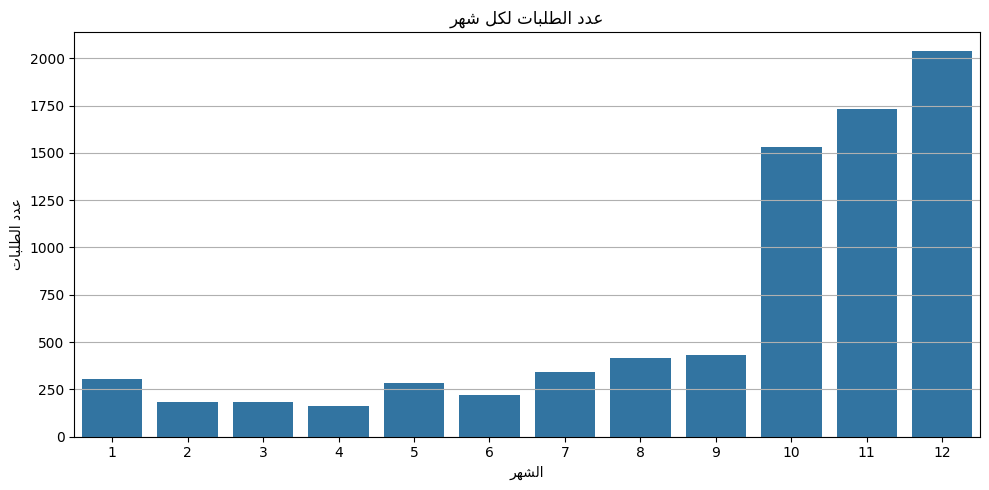

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataframe, x='شهر الطلب', order=sorted(dataframe['شهر الطلب'].unique()))
plt.title(reshape_arabic('عدد الطلبات لكل شهر'))
plt.xlabel(reshape_arabic('الشهر'))
plt.ylabel(reshape_arabic('عدد الطلبات'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

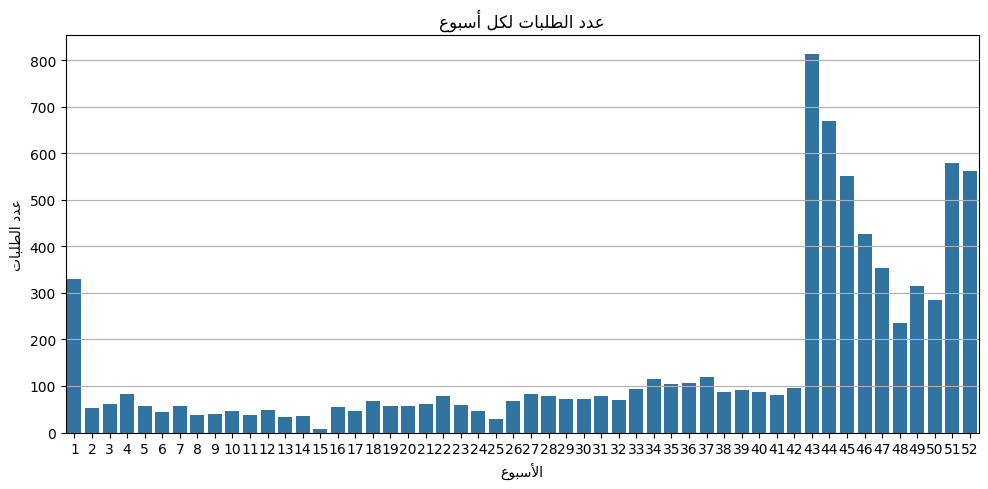

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataframe, x='أسبوع الطلب', order=sorted(dataframe['أسبوع الطلب'].unique()))
plt.title(reshape_arabic('عدد الطلبات لكل أسبوع'))
plt.xlabel(reshape_arabic('الأسبوع'))
plt.ylabel(reshape_arabic('عدد الطلبات'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [46]:
dataframe.columns

Index(['البلدية', 'نوع الطلب', 'اسم النشاط الرئيسي', 'مصدر الطلب',
       'نوع الرخصة', 'نوع اخر اجراء (فوري / غير فوري)',
       'فئة مدة صلاحية الرخصة', 'تاريخ الطلب', 'سنة الطلب', 'شهر الطلب',
       'أسبوع الطلب', 'يوم الطلب', 'يوم الأسبوع'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_11856\101200610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['يوم الأسبوع (عرض)'] = dataframe['يوم الأسبوع'].apply(reshape_arabic)


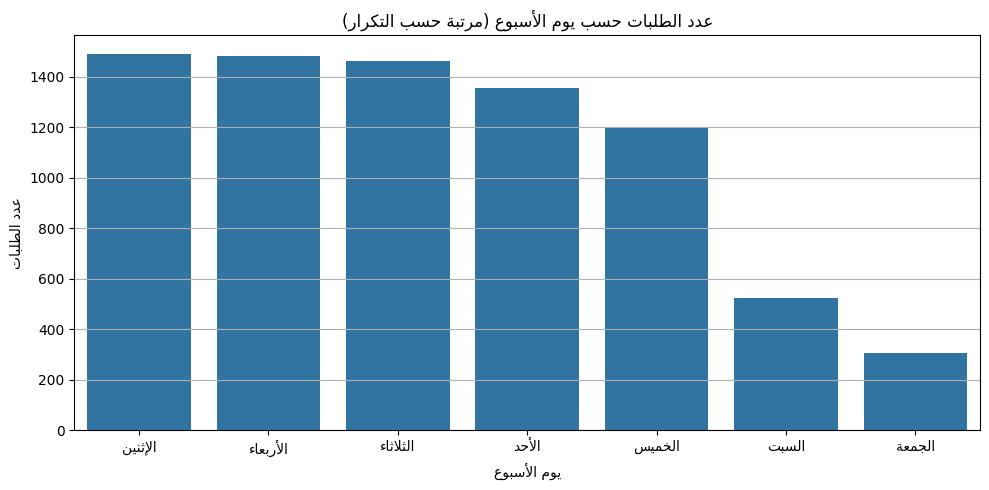

In [47]:
weekday_order = dataframe['يوم الأسبوع'].value_counts().index.tolist()
reshaped_order = [reshape_arabic(day) for day in weekday_order]

dataframe['يوم الأسبوع (عرض)'] = dataframe['يوم الأسبوع'].apply(reshape_arabic)

plt.figure(figsize=(10, 5))
sns.countplot(data=dataframe, x='يوم الأسبوع (عرض)', order=reshaped_order)
plt.title(reshape_arabic('عدد الطلبات حسب يوم الأسبوع (مرتبة حسب التكرار)'))
plt.xlabel(reshape_arabic('يوم الأسبوع'))
plt.ylabel(reshape_arabic('عدد الطلبات'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [48]:
dataframe.columns

Index(['البلدية', 'نوع الطلب', 'اسم النشاط الرئيسي', 'مصدر الطلب',
       'نوع الرخصة', 'نوع اخر اجراء (فوري / غير فوري)',
       'فئة مدة صلاحية الرخصة', 'تاريخ الطلب', 'سنة الطلب', 'شهر الطلب',
       'أسبوع الطلب', 'يوم الطلب', 'يوم الأسبوع', 'يوم الأسبوع (عرض)'],
      dtype='object')

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\

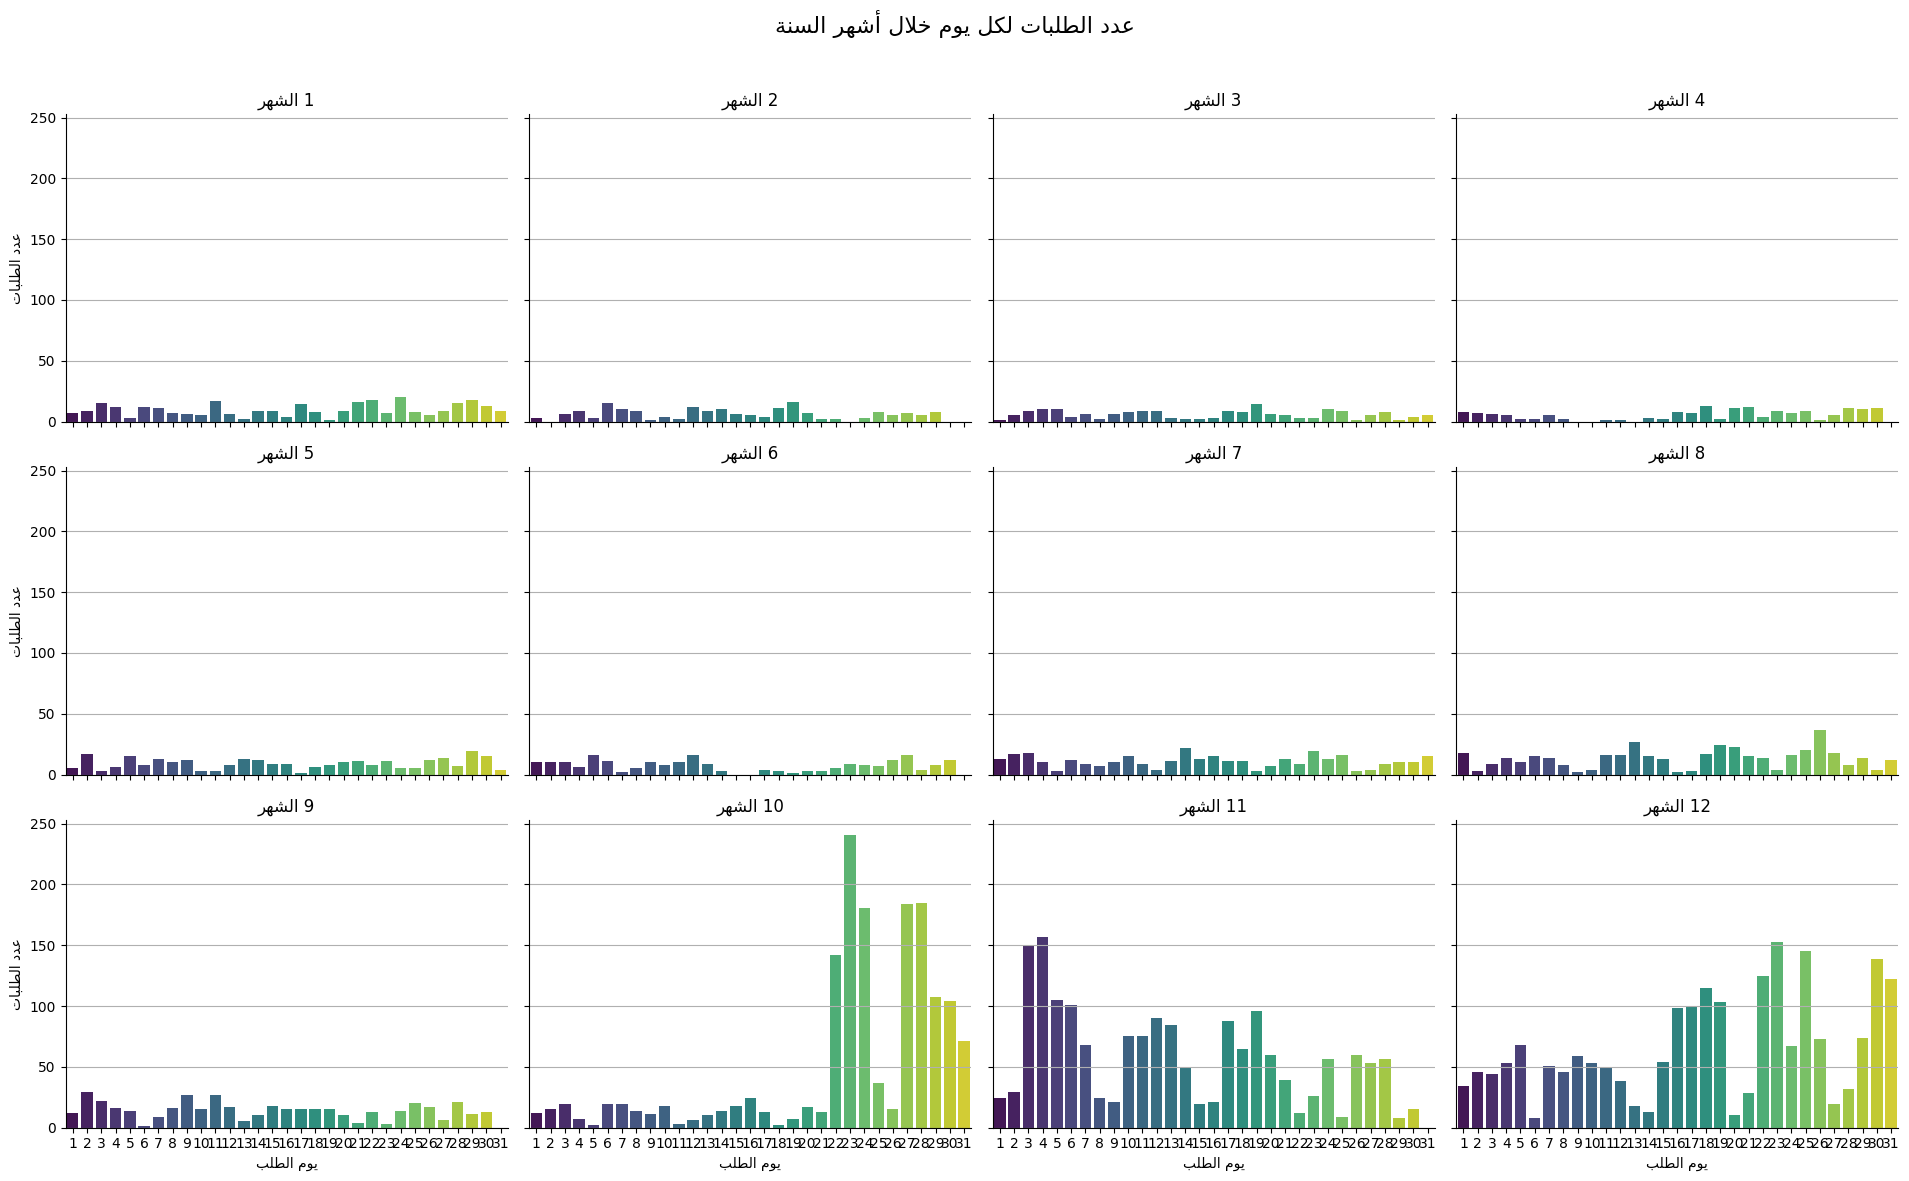

In [49]:
g = sns.FacetGrid(dataframe, col='شهر الطلب', col_wrap=4, height=4, aspect=1.2)
g.map(sns.countplot, 'يوم الطلب', order=range(1, 32), palette='viridis')

for ax in g.axes.flat:
    ax.set_title(reshape_arabic('الشهر') + f" {int(ax.get_title().split('=')[1])}")
    ax.set_xlabel(reshape_arabic('يوم الطلب'))
    ax.set_ylabel(reshape_arabic('عدد الطلبات'))
    ax.grid(axis='y')

plt.suptitle(reshape_arabic('عدد الطلبات لكل يوم خلال أشهر السنة'), fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # لتجنب تغطية العنوان الرئيسي
plt.show()

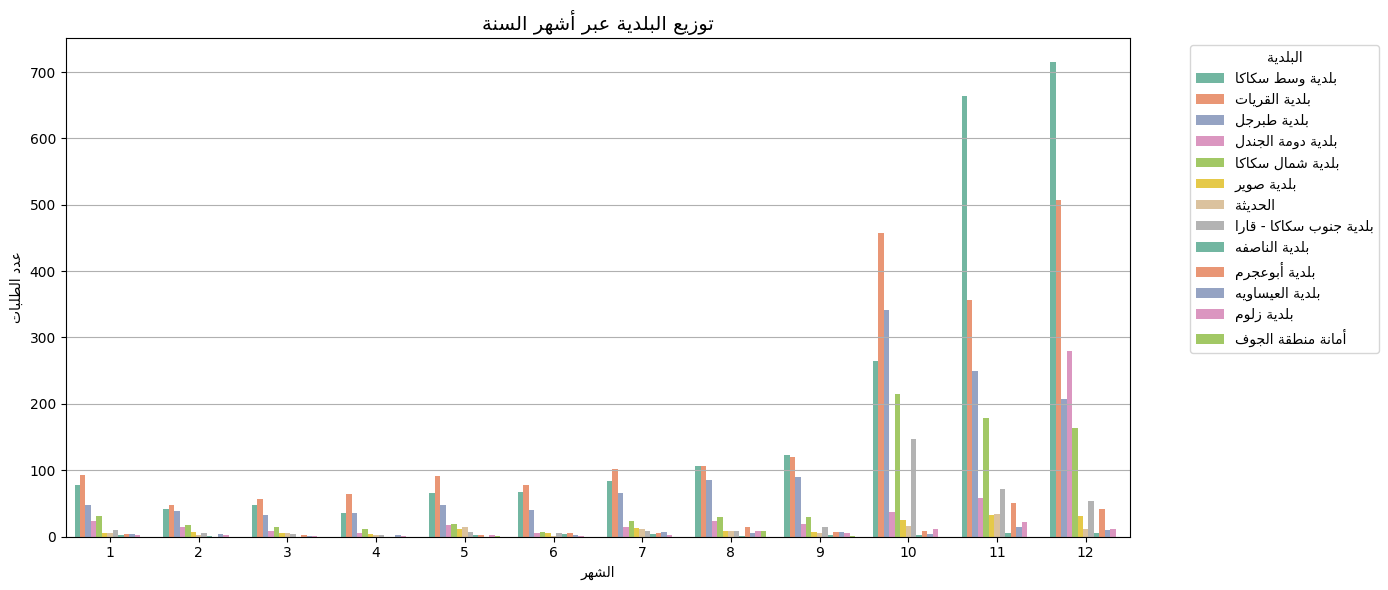

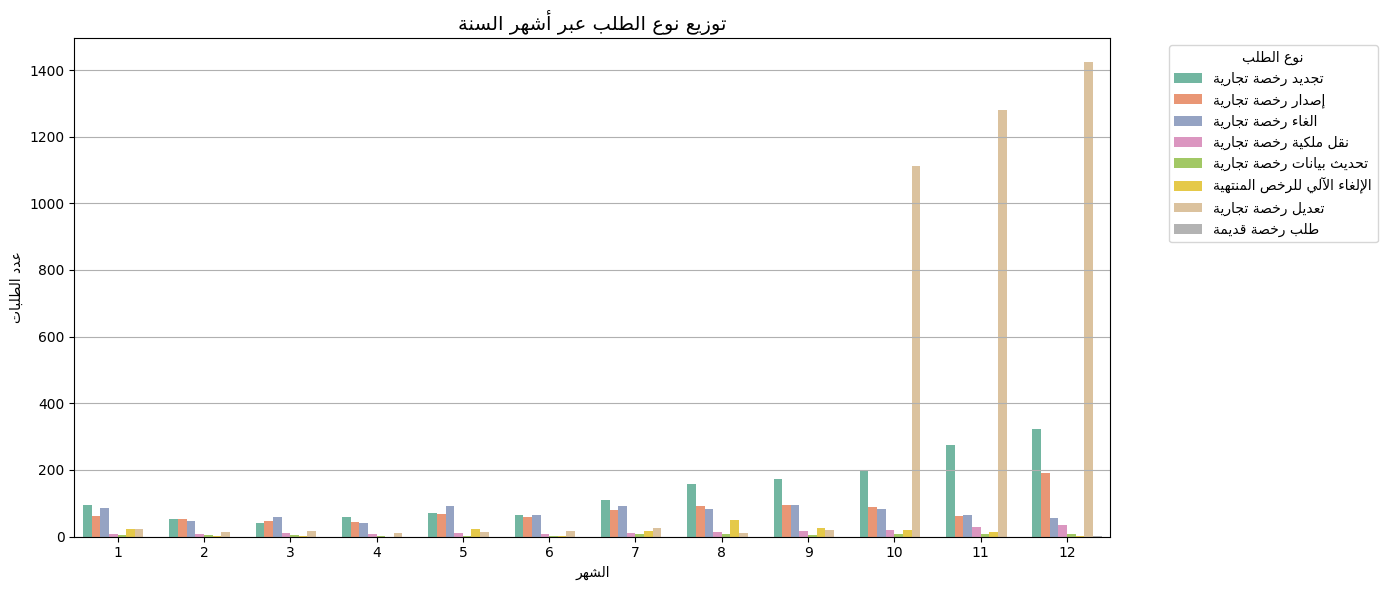

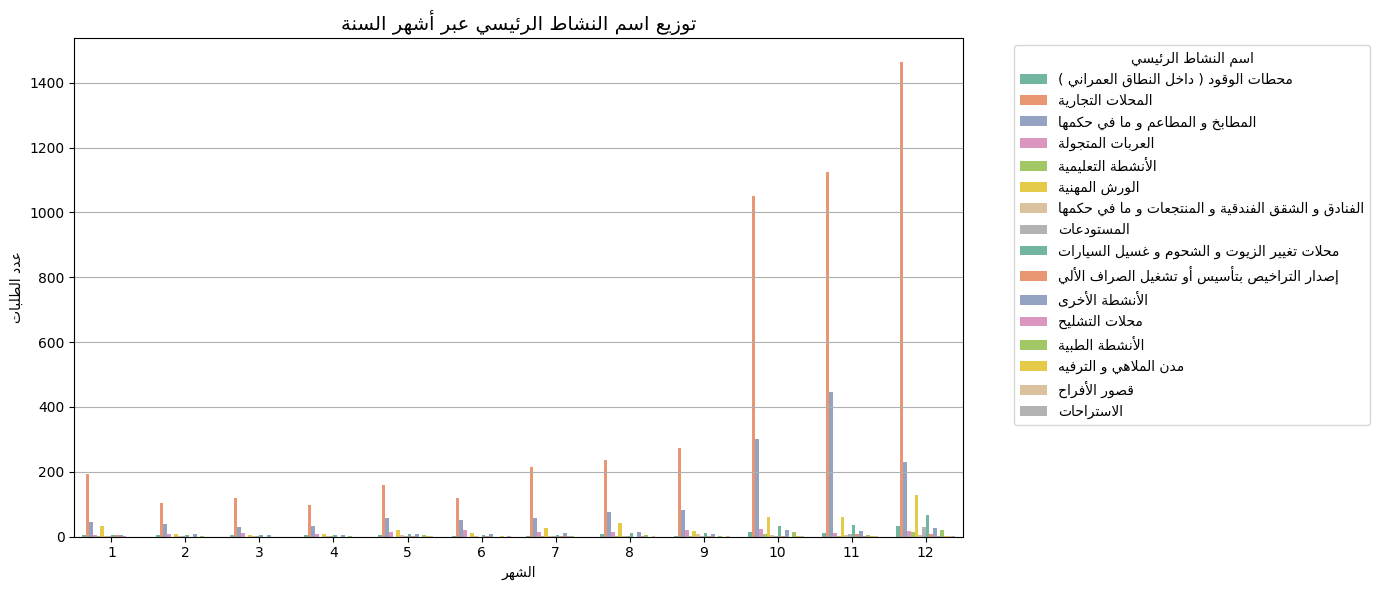

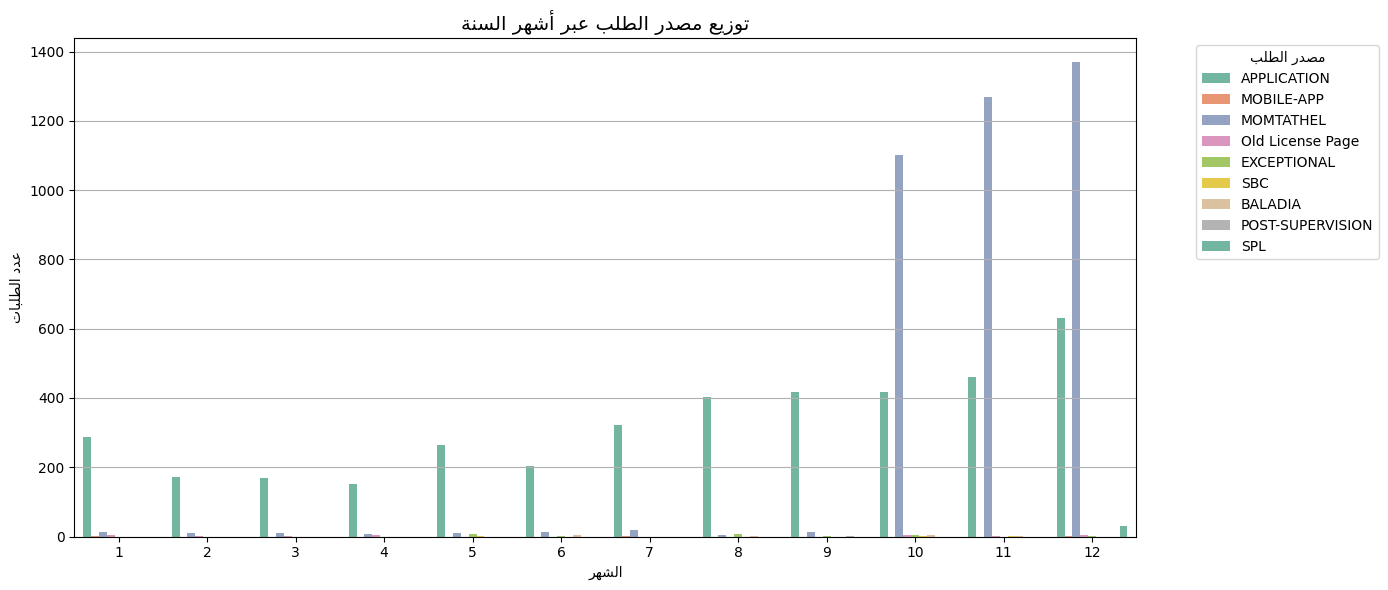

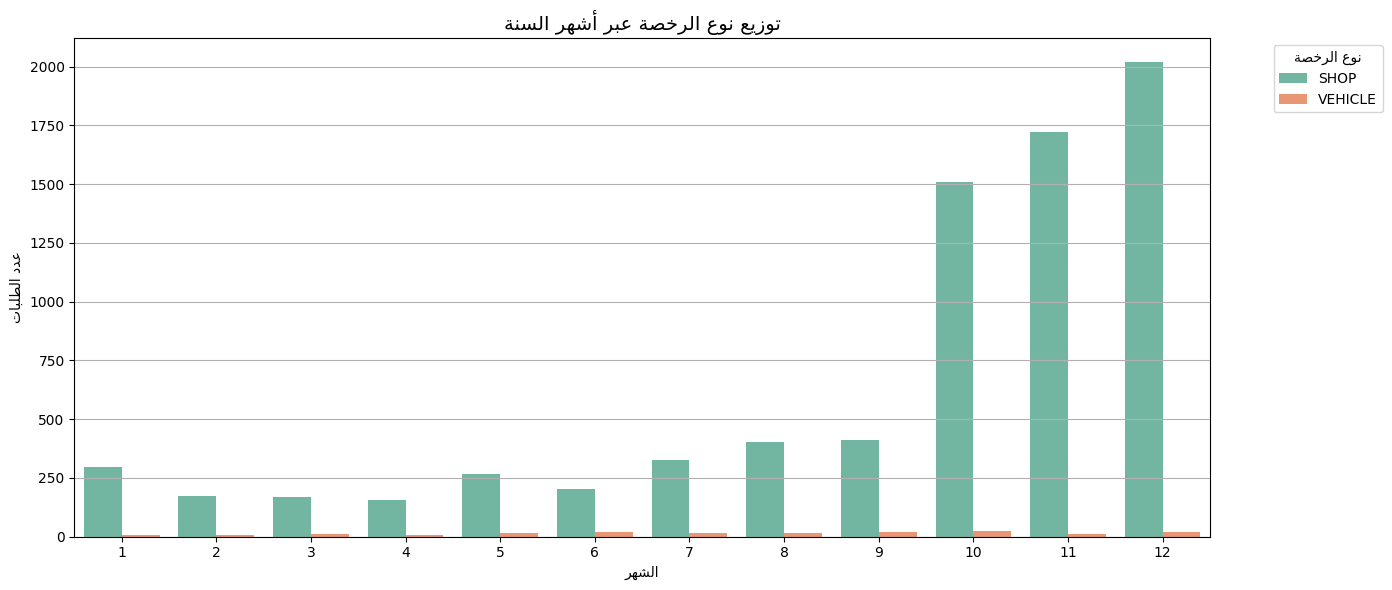

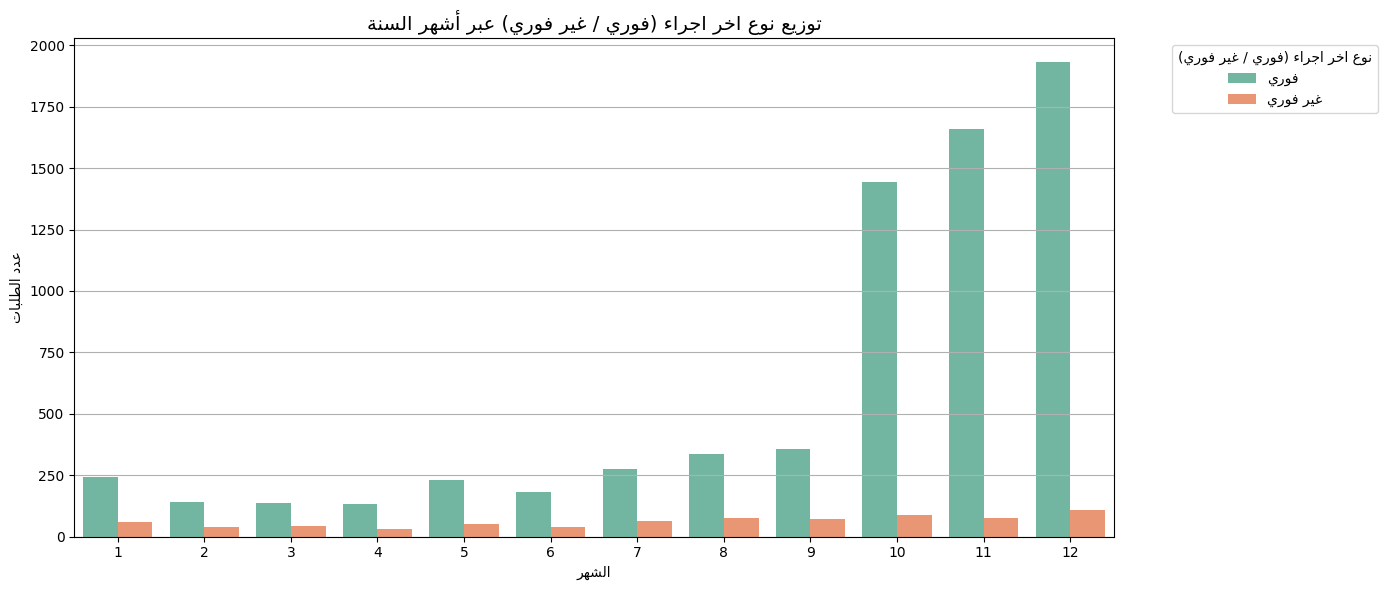

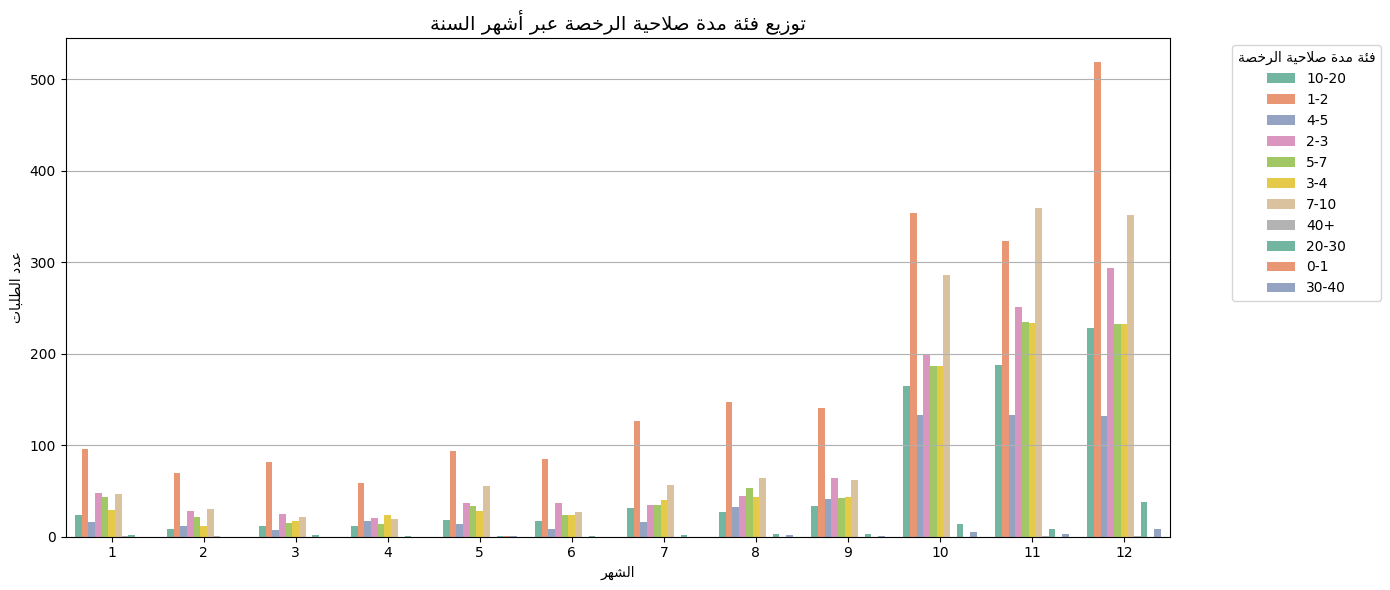

In [50]:

# Optional: limit number of categories per column to show (to avoid clutter)
# top_n = 5

for col in collection:
    categories = dataframe[col].value_counts().index
    df_filtered = dataframe[dataframe[col].isin(categories)].copy()

    df_filtered['category_reshaped'] = df_filtered[col].astype(str).apply(reshape_arabic)

    # Plot
    plt.figure(figsize=(14, 6))
    sns.countplot(
        data=df_filtered,
        x='شهر الطلب',
        hue='category_reshaped',
        palette='Set2'
    )

    plt.title(reshape_arabic(f'توزيع {col} عبر أشهر السنة'), fontsize=14)
    plt.xlabel(reshape_arabic('الشهر'))
    plt.ylabel(reshape_arabic('عدد الطلبات'))
    plt.legend(title=reshape_arabic(col), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


## 3. بناء النماذج التنبؤية
عد الانتهاء من تحليل البيانات الزمنية وفهم الأنماط الموسمية، ننتقل الآن إلى بناء نموذج تنبؤ زمني متعدد الأبعاد، يهدف إلى توقّع حجم الطلب على الرخص التجارية شهريًا وأسبوعيًا، بالإضافة إلى التنبؤ بأنواع الطلبات والأنشطة التجارية المحتملة، وذلك لتقديم توصيات تنبؤية تساعد في تحسين توقيت التقديم وتقليل أوقات الانتظار.

In [51]:
dataframe.columns

Index(['البلدية', 'نوع الطلب', 'اسم النشاط الرئيسي', 'مصدر الطلب',
       'نوع الرخصة', 'نوع اخر اجراء (فوري / غير فوري)',
       'فئة مدة صلاحية الرخصة', 'تاريخ الطلب', 'سنة الطلب', 'شهر الطلب',
       'أسبوع الطلب', 'يوم الطلب', 'يوم الأسبوع', 'يوم الأسبوع (عرض)'],
      dtype='object')

In [52]:
dataframe.sample()

,البلدية,نوع الطلب,اسم النشاط الرئيسي,مصدر الطلب,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),فئة مدة صلاحية الرخصة,تاريخ الطلب,سنة الطلب,شهر الطلب,أسبوع الطلب,يوم الطلب,يوم الأسبوع,يوم الأسبوع (عرض)
5777,بلدية دومة الجندل,تعديل رخصة تجارية,المحلات التجارية,MOMTATHEL,SHOP,فوري,2-3,2024-12-18,2024,12,51,18,الأربعاء,ﺀﺎﻌﺑﺭﻷﺍ


In [53]:
columns_needed

['البلدية',
 'نوع الطلب',
 'اسم النشاط الرئيسي',
 'مصدر الطلب',
 'نوع الرخصة',
 'نوع اخر اجراء (فوري / غير فوري)',
 'فئة مدة صلاحية الرخصة',
 'تاريخ الطلب',
 'سنة الطلب',
 'شهر الطلب',
 'أسبوع الطلب',
 'يوم الطلب',
 'يوم الأسبوع']

In [54]:
dataframe[dataframe.columns[:-1]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7822 entries, 0 to 7822
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   البلدية                          7822 non-null   object        
 1   نوع الطلب                        7822 non-null   object        
 2   اسم النشاط الرئيسي               7822 non-null   object        
 3   مصدر الطلب                       7822 non-null   object        
 4   نوع الرخصة                       7822 non-null   object        
 5   نوع اخر اجراء (فوري / غير فوري)  7822 non-null   object        
 6   فئة مدة صلاحية الرخصة            7822 non-null   object        
 7   تاريخ الطلب                      7822 non-null   datetime64[ns]
 8   سنة الطلب                        7822 non-null   int32         
 9   شهر الطلب                        7822 non-null   int32         
 10  أسبوع الطلب                      7822 non-null   UInt32        
 

In [55]:
from sklearn.preprocessing import LabelEncoder
import joblib

def encode_and_save_encoders(df, columns, encoder_path="label_encoders.pkl"):
    """
    Encodes categorical columns using LabelEncoder and saves the encoders.
    
    Parameters:
        df: DataFrame to encode
        columns: List of column names to encode
        encoder_path: Path to save the encoder dictionary
    
    Returns:
        Encoded DataFrame
    """
    encoders = {}
    
    for col in columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            encoders[col] = le  # Save encoder for later use
    
    # Save all encoders to disk
    joblib.dump(encoders, encoder_path)
    print(f"✅ Encoders saved to {encoder_path}")
    
    return df


In [56]:
dataframe = encode_and_save_encoders(dataframe, columns_needed)

dataframe.sample()

✅ Encoders saved to label_encoders.pkl


C:\Users\USER\AppData\Local\Temp\ipykernel_11856\1004447910.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_11856\1004447910.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_11856\1004447910.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,البلدية,نوع الطلب,اسم النشاط الرئيسي,مصدر الطلب,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),فئة مدة صلاحية الرخصة,تاريخ الطلب,سنة الطلب,شهر الطلب,أسبوع الطلب,يوم الطلب,يوم الأسبوع,يوم الأسبوع (عرض)
7207,12,2,7,0,0,0,9,2024-01-03,2024,1,1,3,1,ﺀﺎﻌﺑﺭﻷﺍ


### 3.1 نموذج التنبؤ الزمني لحجم الطلب *الشهري*

In [57]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def train_prophet_with_accuracy(df):
    # Prepare daily data
    daily = df.groupby('تاريخ الطلب').size().reset_index(name='y')
    daily.columns = ['ds', 'y']
    daily['ds'] = pd.to_datetime(daily['ds'])

    split_index = int(len(daily) * 0.5)
    train = daily.iloc[:split_index]
    test = daily.iloc[split_index:]
    
    # print("Variance in y:", daily['y'].var())

    # Fit the model
    model = Prophet()
    model.fit(train)

    # Make future dataframe and forecast
    future = test[['ds']].copy()
    forecast = model.predict(future)

    # Merge actual vs predicted
    forecasted = forecast[['ds', 'yhat']].copy()
    merged = test.merge(forecasted, on='ds')

    plt.plot(merged['ds'], merged['y'], label='Actual')
    plt.plot(merged['ds'], merged['yhat'], label='Forecast')
    plt.legend()
    plt.title('Actual vs Forecast')
    plt.show()
    
    # Calculate metrics
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

    print("Model performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return model


12:56:44 - cmdstanpy - INFO - Chain [1] start processing
12:56:45 - cmdstanpy - INFO - Chain [1] done processing


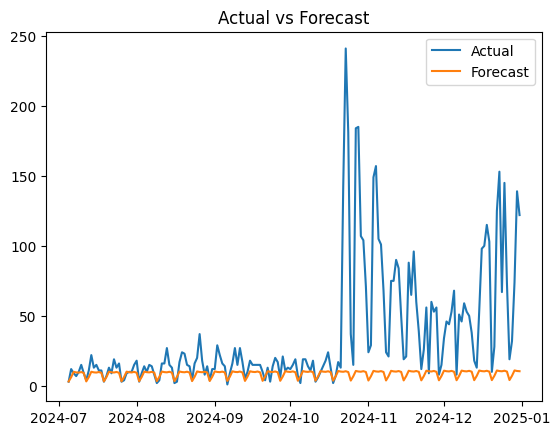

Model performance:
MAE: 27.50
RMSE: 49.97


In [58]:
prophet_model = train_prophet_with_accuracy(dataframe)

In [59]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def train_prophet_full(df, forecast_days=90, evaluate=False):
    """
    Train Prophet on full dataset and forecast into future.
    If `evaluate=True`, it compares with actual future values (if available).
    """
    # Prepare daily data
    daily = df.groupby('تاريخ الطلب').size().reset_index(name='y')
    daily.columns = ['ds', 'y']
    daily['ds'] = pd.to_datetime(daily['ds'])

    # Train on full dataset
    model = Prophet()
    model.fit(daily)

    # Forecast future
    future = model.make_future_dataframe(periods=forecast_days, freq='D')
    forecast = model.predict(future)

    # Plot forecast
    plt.figure(figsize=(10, 5))
    plt.plot(daily['ds'], daily['y'], label='Actual')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
    plt.axvline(daily['ds'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.legend()
    plt.title('Forecast for Future Demand')
    plt.show()

    # Optional: Evaluate if future data exists
    if evaluate:
        test = daily[daily['ds'] > daily['ds'].max() - pd.Timedelta(days=forecast_days)]
        forecasted = forecast[['ds', 'yhat']].copy()
        merged = test.merge(forecasted, on='ds')
        if not merged.empty:
            mae = mean_absolute_error(merged['y'], merged['yhat'])
            rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
            r2 = r2_score(merged['y'], merged['yhat'])
            print("Evaluation on Recent Data:")
            print(f"MAE: {mae:.2f}")
            print(f"RMSE: {rmse:.2f}")
            print(f"R²: {r2:.2f}")
        else:
            print("No overlapping dates to evaluate against.")
    
    return model, forecast


12:56:45 - cmdstanpy - INFO - Chain [1] start processing
12:56:45 - cmdstanpy - INFO - Chain [1] done processing


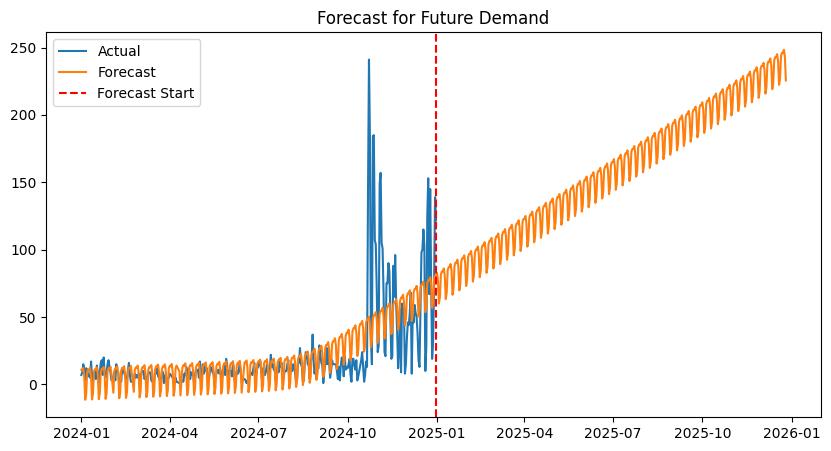

Evaluation on Recent Data:
MAE: 13.75
RMSE: 24.50
R²: 0.48


In [60]:
model, forecast = train_prophet_full(df, forecast_days=360, evaluate=True)


### 3.2 التنبؤ بالأنواع

In [61]:
dataframe

,البلدية,نوع الطلب,اسم النشاط الرئيسي,مصدر الطلب,نوع الرخصة,نوع اخر اجراء (فوري / غير فوري),فئة مدة صلاحية الرخصة,تاريخ الطلب,سنة الطلب,شهر الطلب,أسبوع الطلب,يوم الطلب,يوم الأسبوع,يوم الأسبوع (عرض)
0,7,5,1,4,0,1,4,2024-12-22,2024,12,51,22,0,ﺪﺣﻷﺍ
1,11,0,7,0,0,1,1,2024-09-14,2024,9,37,14,6,ﺖﺒﺴﻟﺍ
2,1,0,7,0,0,0,1,2024-05-21,2024,5,21,21,3,ﺀﺎﺛﻼﺜﻟﺍ
3,7,5,7,4,0,1,10,2024-12-09,2024,12,50,9,2,ﻦﻴﻨﺛﻹﺍ
4,12,7,9,0,0,1,1,2024-11-06,2024,11,45,6,1,ﺀﺎﻌﺑﺭﻷﺍ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,4,0,5,0,1,0,1,2024-03-30,2024,3,13,30,6,ﺖﺒﺴﻟﺍ
7819,9,5,14,4,0,1,3,2024-12-22,2024,12,51,22,0,ﺪﺣﻷﺍ
7820,1,3,9,0,0,1,7,2024-05-09,2024,5,19,9,5,ﺲﻴﻤﺨﻟﺍ
7821,11,5,7,4,0,1,4,2024-11-19,2024,11,47,19,3,ﺀﺎﺛﻼﺜﻟﺍ


In [62]:
from sklearn.ensemble import RandomForestClassifier

def train_classifiers(df):
    X = df[['البلدية','مصدر الطلب', 'نوع الرخصة','نوع اخر اجراء (فوري / غير فوري)', 'فئة مدة صلاحية الرخصة',
            'شهر الطلب', 'أسبوع الطلب','يوم الطلب' ]]
    y_type = df['نوع الطلب']
    y_activity = df['اسم النشاط الرئيسي']
    
    model_type = RandomForestClassifier()
    model_type.fit(X, y_type)
    
    model_activity = RandomForestClassifier()
    model_activity.fit(X, y_activity)
    
    print("Model performance")
    print(model_type.score(X, y_type), model_activity.score(X, y_activity))
    return model_type, model_activity


In [63]:
train_classifiers(dataframe)

Model performance
0.9680388647404756 0.8695985681411403


(RandomForestClassifier(), RandomForestClassifier())

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def train_classifiers(df):
    # Features and targets
    X = df[['البلدية','مصدر الطلب', 'نوع الرخصة','نوع اخر اجراء (فوري / غير فوري)', 'فئة مدة صلاحية الرخصة',
            'شهر الطلب', 'أسبوع الطلب','يوم الطلب' ]]
    
    y_type = df['نوع الطلب']
    y_activity = df['اسم النشاط الرئيسي']

    # Split data (80% train, 20% test)
    X_train, X_test, y_type_train, y_type_test = train_test_split(X, y_type, test_size=0.1, random_state=42)
    _, _, y_activity_train, y_activity_test = train_test_split(X, y_activity, test_size=0.1, random_state=42)

    # Train models
    model_type = RandomForestClassifier()
    model_type.fit(X_train, y_type_train)
    
    model_activity = RandomForestClassifier()
    model_activity.fit(X_train, y_activity_train)

    # Predict
    y_type_pred = model_type.predict(X_test)
    y_activity_pred = model_activity.predict(X_test)

    # Evaluate
    print("Model performance:")
    print("Model performance")
    print(model_type.score(X, y_type), model_activity.score(X, y_activity))
    print("نوع الطلب accuracy:", accuracy_score(y_type_test, y_type_pred))
    print("اسم النشاط الرئيسي accuracy:", accuracy_score(y_activity_test, y_activity_pred))

    # Optional: Print detailed report
    print("\nClassification Report for نوع الطلب:")
    print(classification_report(y_type_test, y_type_pred))

    print("\nClassification Report for اسم النشاط الرئيسي:")
    print(classification_report(y_activity_test, y_activity_pred))

    # Plot Confusion Matrix for نوع الطلب
    plt.figure(figsize=(10, 5))
    ConfusionMatrixDisplay.from_estimator(model_type, X_test, y_type_test, xticks_rotation=45)
    plt.title("Confusion Matrix - نوع الطلب")
    plt.show()

    # Plot Confusion Matrix for اسم النشاط الرئيسي
    plt.figure(figsize=(10, 5))
    ConfusionMatrixDisplay.from_estimator(model_activity, X_test, y_activity_test, xticks_rotation=45)
    plt.title("Confusion Matrix - اسم النشاط الرئيسي")
    plt.show()

    return model_type, model_activity


Model performance:
Model performance
0.9511633853234467 0.8505497315264638
نوع الطلب accuracy: 0.7752234993614304
اسم النشاط الرئيسي accuracy: 0.6232439335887612

Classification Report for نوع الطلب:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       110
           1       0.54      0.41      0.47        17
           2       0.39      0.28      0.33        93
           3       0.61      0.78      0.69       150
           4       0.00      0.00      0.00         5
           5       0.99      0.98      0.99       386
           7       0.00      0.00      0.00        22

    accuracy                           0.78       783
   macro avg       0.46      0.45      0.45       783
weighted avg       0.76      0.78      0.76       783


Classification Report for اسم النشاط الرئيسي:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00    

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<Figure size 1000x500 with 0 Axes>

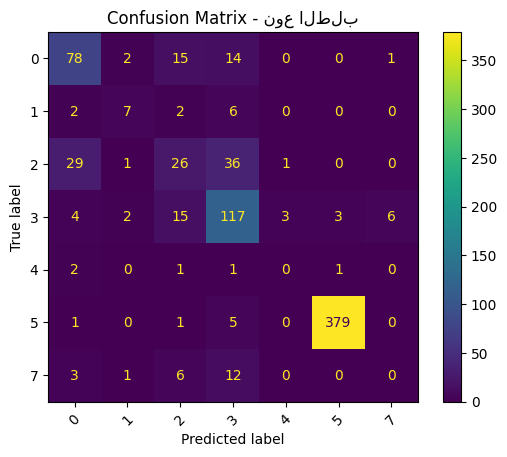

<Figure size 1000x500 with 0 Axes>

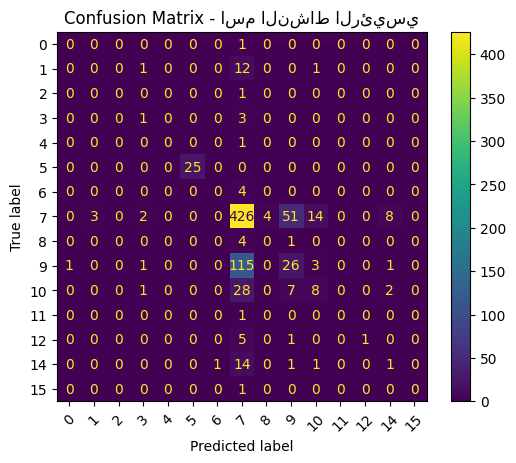

In [65]:
clf_type, clf_activity = train_classifiers(dataframe)


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def train_classifiers_crossval(df):
    X = df[['البلدية','مصدر الطلب', 'نوع الرخصة','نوع اخر اجراء (فوري / غير فوري)', 'فئة مدة صلاحية الرخصة',
            'شهر الطلب', 'أسبوع الطلب','يوم الطلب' ]]
    
    y_type = df['نوع الطلب']
    y_activity = df['اسم النشاط الرئيسي']

    model_type = RandomForestClassifier()
    model_activity = RandomForestClassifier()

    # Cross-validation scores
    scores_type = cross_val_score(model_type, X, y_type, cv=5)
    scores_activity = cross_val_score(model_activity, X, y_activity, cv=5)
    
    # Print results
    print("Cross-Validated Accuracy (نوع الطلب):")
    print(f"Scores: {scores_type}")
    print(f"Mean Accuracy: {np.mean(scores_type):.3f}")

    print("\nCross-Validated Accuracy (اسم النشاط الرئيسي):")
    print(f"Scores: {scores_activity}")
    print(f"Mean Accuracy: {np.mean(scores_activity):.3f}")

    model_type.fit(X, y_type)
    model_activity.fit(X, y_activity)
    
    print("Model performance")
    print(model_type.score(X, y_type), model_activity.score(X, y_activity))
    return model_type, model_activity


In [67]:
type_cvModel,act_cvModel = train_classifiers_crossval(dataframe)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Accuracy (نوع الطلب):
Scores: [0.78530351 0.78977636 0.76982097 0.78132992 0.7870844 ]
Mean Accuracy: 0.783

Cross-Validated Accuracy (اسم النشاط الرئيسي):
Scores: [0.63003195 0.62044728 0.63043478 0.62915601 0.63235294]
Mean Accuracy: 0.628
Model performance
0.9679110201994375 0.8695985681411403


In [68]:
!pip install flaml


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 3.2.1 automl

In [69]:
dataframe.columns

Index(['البلدية', 'نوع الطلب', 'اسم النشاط الرئيسي', 'مصدر الطلب',
       'نوع الرخصة', 'نوع اخر اجراء (فوري / غير فوري)',
       'فئة مدة صلاحية الرخصة', 'تاريخ الطلب', 'سنة الطلب', 'شهر الطلب',
       'أسبوع الطلب', 'يوم الطلب', 'يوم الأسبوع', 'يوم الأسبوع (عرض)'],
      dtype='object')

In [70]:
from flaml import AutoML

def train_automl_for_both_targets(df):
    X = df[['البلدية','مصدر الطلب', 'نوع الرخصة','نوع اخر اجراء (فوري / غير فوري)', 'فئة مدة صلاحية الرخصة',
            'شهر الطلب', 'أسبوع الطلب','يوم الطلب' ]]
    y_type = df['نوع الطلب']
    y_activity = df['اسم النشاط الرئيسي']

    automl_type = AutoML(task="classification", time_budget=300)
    automl_type.fit(X, y_type)
    print("Best estimator type model:", automl_type.best_estimator)
    print("Best config type model:", automl_type.best_config)
    print("Best validation loss (score) type model:", automl_type.best_loss)

    automl_activity = AutoML(task="classification", time_budget=300)
    automl_activity.fit(X, y_activity)
    print("Best estimator activity model:", automl_activity.best_estimator)
    print("Best config activity model:", automl_activity.best_config)
    print("Best validation loss (score) activity model:", automl_activity.best_loss)

    return automl_type, automl_activity


In [71]:
act_model, type_model = train_automl_for_both_targets(dataframe)

[flaml.automl.logger: 08-07 12:56:55] {1728} INFO - task = classification
[flaml.automl.logger: 08-07 12:56:55] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 08-07 12:56:55] {1838} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 08-07 12:56:55] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 08-07 12:56:55] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-07 12:56:55] {2393} INFO - Estimated sufficient time budget=1503s. Estimated necessary time budget=37s.
[flaml.automl.logger: 08-07 12:56:55] {2442} INFO -  at 0.2s,	estimator lgbm's best error=0.9131,	best estimator lgbm's best error=0.9131
[flaml.automl.logger: 08-07 12:56:55] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-07 12:56:55] {2442} INFO -  at 0.4s,	estimator lgbm's best error=0.9131,	best estimator lgbm's best error=0.9131
[flaml.automl.log

##### 3.2.1 تقييم النموذج

In [72]:
print("Best estimator activity model:", act_model.best_estimator)
print("Best config activity model:", act_model.best_config)
print("Best validation loss (score) activity model:", act_model.best_loss)

Best estimator activity model: lgbm
Best config activity model: {'n_estimators': 58, 'num_leaves': 8, 'min_child_samples': 7, 'learning_rate': np.float64(0.1301258809080873), 'log_max_bin': 9, 'colsample_bytree': np.float64(0.7120958974273369), 'reg_alpha': np.float64(0.0009765625000000002), 'reg_lambda': np.float64(0.22428611705183024)}
Best validation loss (score) activity model: 0.4967882658173865


In [73]:
print("Best estimator activity model:", type_model.best_estimator)
print("Best config activity model:", type_model.best_config)
print("Best validation loss (score) activity model:", type_model.best_loss)

Best estimator activity model: lgbm
Best config activity model: {'n_estimators': 61, 'num_leaves': 15, 'min_child_samples': 5, 'learning_rate': np.float64(0.0826069776094021), 'log_max_bin': 9, 'colsample_bytree': np.float64(0.7656534838337611), 'reg_alpha': np.float64(0.02046640007359354), 'reg_lambda': np.float64(2.119459343826394)}
Best validation loss (score) activity model: 1.018072998948912


## 4. بناء نظام التوقعات

In [74]:
import pandas as pd
import joblib

# Load saved encoders
encoders = joblib.load("label_encoders.pkl")

def encode_input_for_prediction(input_dict, encoders):
    encoded_input = {}
    for col, val in input_dict.items():
        if col in encoders:
            le = encoders[col]
            try:
                encoded_val = le.transform([val])[0]
            except ValueError:
                raise ValueError(f"❌ Value '{val}' not seen during training for column '{col}'")
            encoded_input[col] = encoded_val
        else:
            encoded_input[col] = val  
    return pd.DataFrame([encoded_input])

def advise_user(future_date, prophet_model, clf_type, clf_activity,
                municipality, source, license_type,
                procedure_type, validity_category,
                threshold=10):
    
    # Step 1: Date features
    date = pd.to_datetime(future_date)
    month = date.month
    week = date.isocalendar().week
    day = date.day

    # Step 2: Forecast future demand
    last_train_date = prophet_model.history['ds'].max()
    days_needed = (date - last_train_date).days + 30
    if days_needed < 0:
        days_needed *= -1

    future_df = prophet_model.make_future_dataframe(periods=days_needed, freq='D')
    forecast = prophet_model.predict(future_df)
    predicted_row = forecast[forecast['ds'] == date]

    if predicted_row.empty:
        return "! No forecast data available for this date."

    predicted_demand = predicted_row['yhat'].values[0]

    # Step 3: Raw user input
    raw_input = {
        'البلدية': municipality,
        'مصدر الطلب': source,
        'نوع الرخصة': license_type,
        'نوع اخر اجراء (فوري / غير فوري)': procedure_type,
        'فئة مدة صلاحية الرخصة': validity_category,
        'شهر الطلب': month,
        'أسبوع الطلب': week,
        'يوم الطلب': day
    }

    # Step 4: Encode
    X_encoded = encode_input_for_prediction(raw_input, encoders)

    # Step 5: Predict
   # Get encoded predictions
    encoded_type = clf_type.predict(X_encoded)[0]
    encoded_activity = clf_activity.predict(X_encoded)[0]

# Decode predictions using saved encoders
    predicted_type = encoders['نوع الطلب'].inverse_transform([encoded_type])[0]
    predicted_activity = encoders['اسم النشاط الرئيسي'].inverse_transform([encoded_activity])[0]


    # Step 6: Advisory
    if predicted_demand > threshold:
        return f"""
{date.strftime('%d %B %Y')} is expected to be busy. It's recommended to delay submitting your request to avoid delays.
Most common request type: {predicted_type}
Dominant activities: {predicted_activity}
        """.strip()
    else:
        return f"""
{date.strftime('%d %B %Y')} is a suitable time to submit your request.
Expected request type: {predicted_type}
Common activities: {predicted_activity}
        """.strip()


In [75]:
input_columns = [
    'البلدية',
    'مصدر الطلب',
    'نوع الرخصة',
    'نوع اخر اجراء (فوري / غير فوري)',
    'فئة مدة صلاحية الرخصة'
]


In [81]:
sample_row = df[input_columns].sample(1).iloc[0]


In [82]:
sample_input = sample_row.to_dict()
sample_input

{'البلدية': 'بلدية وسط سكاكا',
 'مصدر الطلب': 'APPLICATION',
 'نوع الرخصة': 'SHOP',
 'نوع اخر اجراء (فوري / غير فوري)': 'غير فوري',
 'فئة مدة صلاحية الرخصة': '1-2'}

In [83]:
advise_user(
    future_date="2024-08-25",
    prophet_model=prophet_model,
    clf_type=type_cvModel,
    clf_activity=act_cvModel,
    municipality=sample_input['البلدية'],
    source=sample_input['مصدر الطلب'],
    license_type=sample_input['نوع الرخصة'],
    procedure_type=sample_input['نوع اخر اجراء (فوري / غير فوري)'],
    validity_category=sample_input['فئة مدة صلاحية الرخصة']
)


"25 August 2024 is expected to be busy. It's recommended to delay submitting your request to avoid delays.\nMost common request type: إصدار رخصة تجارية\nDominant activities: الورش المهنية"

## 5. حفظ النماذج

In [79]:
import joblib

# Save
with open('prophet_model.pkl', 'wb') as f:
    joblib.dump(prophet_model, f)

# Load
with open('prophet_model.pkl', 'rb') as f:
    loaded_prophet_model = joblib.load(f)


In [80]:
# Save
with open('type_cvModel.pkl', 'wb') as f:
    joblib.dump(type_cvModel, f)

with open('act_cvModel.pkl', 'wb') as f:
    joblib.dump(act_cvModel, f)

# Load
with open('type_cvModel.pkl', 'rb') as f:
    type_cvModel = joblib.load(f)

with open('act_cvModel.pkl', 'rb') as f:
    act_cvModel = joblib.load(f)
